(ttest)=
# Comparing Two Means


In the previous chapter we covered the situation when your outcome variable is nominal scale and your predictor variable[^note1] is also nominal scale. Lots of real world situations have that character, and so you'll find that chi-square tests in particular are quite widely used. However, you're much more likely to find yourself in a situation where your outcome variable is interval scale or higher, and what you're interested in is whether the average value of the outcome variable is higher in one group or another. For instance, a psychologist might want to know if anxiety levels are higher among parents than non-parents, or if working memory capacity is reduced by listening to music (relative to not listening to music). In a medical context, we might want to know if a new drug increases or decreases blood pressure. An agricultural scientist might want to know whether adding phosphorus to Australian native plants will kill them.[^note2] In all these situations, our outcome variable is a fairly continuous, interval or ratio scale variable; and our predictor is a binary "grouping" variable. In other words, we want to compare the means of the two groups. 

The standard answer to the problem of comparing means is to use a $t$-test, of which there are several varieties depending on exactly what question you want to solve. As a consequence, the majority of this chapter focuses on different types of $t$-test: one sample $t$-tests are discussed in Section \@ref(onesamplettest), independent samples $t$-tests are discussed in Sections \@ref(studentttest) and \@ref(welchttest), and paired samples $t$-tests are discussed in Section \@ref(pairedsamplesttest). After that, we'll talk a bit about Cohen's $d$, which is the standard measure of effect size for a $t$-test (Section \@ref(cohensd)). The later sections of the chapter focus on the assumptions of the $t$-tests, and possible remedies if they are violated. However, before discussing any of these useful things, we'll start with a discussion of the $z$-test. 



## The one-sample $z$-test

In this section I'll describe one of the most useless tests in all of statistics: the **_$z$-test_**. Seriously -- this test is almost never used in real life. Its only real purpose is that, when teaching statistics, it's a very convenient stepping stone along the way towards the $t$-test, which is probably the most (over)used tool in all statistics.

### The inference problem that the test addresses

To introduce the idea behind the $z$-test, let's use a simple example. A friend of mine, Dr Zeppo, grades his introductory statistics class on a curve. Let's suppose that the average grade in his class is 67.5, and the standard deviation is 9.5. Of his many hundreds of students, it turns out that 20 of them also take psychology classes. Out of curiosity, I find myself wondering: do the psychology students tend to get the same grades as everyone else (i.e., mean 67.5) or do they tend to score higher or lower? He emails me the `zeppo.csv` file, which I use to pull up the `grades` of those students, 

In [250]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


and calculate the mean:

In [251]:
import statistics
statistics.mean(df['grades'])

72.3

Hm. It *might* be that the psychology students are scoring a bit higher than normal: that sample mean of $\bar{X} = 72.3$ is a fair bit higher than the hypothesised population mean of $\mu = 67.5$, but on the other hand, a sample size of $N = 20$ isn't all that big. Maybe it's pure chance. 

To answer the question, it helps to be able to write down what it is that I think I know. Firstly, I know that the sample mean is $\bar{X} = 72.3$. If I'm willing to assume that the psychology students have the same standard deviation as the rest of the class, then I can say that the population standard deviation is $\sigma = 9.5$. I'll also assume that since Dr Zeppo is grading to a curve, the psychology student grades are normally distributed. 

Next, it helps to be clear about what I want to learn from the data. In this case, my research hypothesis relates to the *population* mean $\mu$ for the psychology student grades, which is unknown. Specifically, I want to know if $\mu = 67.5$ or not. Given that this is what I know, can we devise a hypothesis test to solve our problem? The data, along with the hypothesised distribution from which they are thought to arise, are shown in {numref}`fig-zeppo`. Not entirely obvious what the right answer is, is it? For this, we are going to need some statistics.

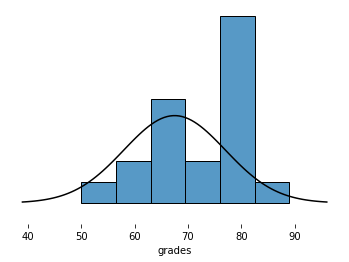

In [252]:
from myst_nb import glue
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5
sigma = 9.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)


glue("zeppo-fig", ax, display=False)

```{glue:figure} zeppo-fig
:figwidth: 600px
:name: fig-zeppo


The theoretical distribution (solid line) from which the psychology student grades (blue bars) are supposed to have been generated.

```

### Constructing the hypothesis test

The first step in constructing a hypothesis test is to be clear about what the null and alternative hypotheses are. This isn't too hard to do. Our null hypothesis, $H_0$, is that the true population mean $\mu$ for psychology student grades is 67.5\%; and our alternative hypothesis is that the population mean *isn't* 67.5\%. If we write this in mathematical notation, these hypotheses become,

$$
\begin{array}{ll}
H_0: & \mu = 67.5 \\
H_1: & \mu \neq 67.5
\end{array}
$$

though to be honest this notation doesn't add much to our understanding of the problem, it's just a compact way of writing down what we're trying to learn from the data. The null hypotheses $H_0$ and the alternative hypothesis $H_1$ for our test are both illustrated in {numref}`fig-ztesthyp`. In addition to providing us with these hypotheses, the scenario outlined above provides us with a fair amount of background knowledge that might be useful. Specifically, there are two special pieces of information that we can add:

1 The psychology grades are normally distributed.
1 The true standard deviation of these scores $\sigma$ is known to be 9.5.

For the moment, we'll act as if these are absolutely trustworthy facts. In real life, this kind of absolutely trustworthy background knowledge doesn't exist, and so if we want to rely on these facts we'll just have make the *assumption* that these things are true. However, since these assumptions may or may not be warranted, we might need to check them. For now though, we'll keep things simple.

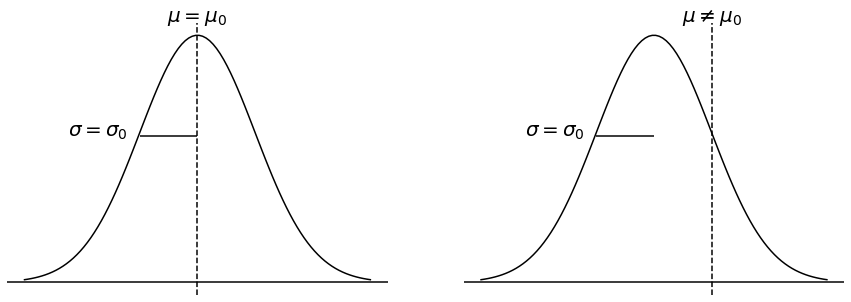

In [253]:
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=x,y=y, color='black', ax=axes[0])
sns.lineplot(x=x,y=y, color='black', ax=axes[1])

axes[0].set_frame_on(False)
axes[1].set_frame_on(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)

axes[0].axhline(y=0, color='black')
axes[0].axvline(x=mu, color='black', linestyle='--')

axes[1].axhline(y=0, color='black')
axes[1].axvline(x=mu + sigma, color='black', linestyle='--')

axes[0].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')
axes[1].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')


axes[0].text(mu,42, r'$\mu = \mu_0$', size=20, ha="center")
axes[1].text(mu + sigma, 42, r'$\mu \neq \mu_0$', size=20, ha="center")

axes[0].text(mu-sigma - 0.2, 23.6, r'$\sigma = \sigma_0$', size=20, ha="right")
axes[1].text(mu-sigma - 0.2, 23.6, r'$\sigma = \sigma_0$', size=20, ha="right")


glue("ztesthyp-fig", ax, display=False)

```{glue:figure} ztesthyp-fig
:figwidth: 600px
:name: fig-ztesthyp


Graphical illustration of the null and alternative hypotheses assumed by the one sample $z$-test (the two sided version, that is). The null and alternative hypotheses both assume that the population distribution is normal, and additionally assumes that the population standard deviation is known (fixed at some value $\sigma_0$). The null hypothesis (left) is that the population mean $\mu$ is equal to some specified value $\mu_0$. The alternative hypothesis is that the population mean differs from this value, $\mu \neq \mu_0$.

```




The next step is to figure out what we would be a good choice for a diagnostic test statistic; something that would help us discriminate between $H_0$ and $H_1$. Given that the hypotheses all refer to the population mean $\mu$, you'd feel pretty confident that the sample mean $\bar{X}$ would be a pretty useful place to start. What we could do, is look at the difference between the sample mean $\bar{X}$ and the value that the null hypothesis predicts for the population mean. In our example, that would mean we calculate $\bar{X} - 67.5$. More generally, if we let $\mu_0$ refer to the value that the null hypothesis claims is our population mean, then we'd want to calculate

$$
\bar{X} - \mu_0
$$

If this quantity equals or is very close to 0, things are looking good for the null hypothesis. If this quantity is a long way away from 0, then it's looking less likely that the null hypothesis is worth retaining. But how far away from zero should it be for us to reject $H_0$? 

To figure that out, we need to be a bit more sneaky, and we'll need to rely on those two pieces of background knowledge that I wrote down previously, namely that the raw data are normally distributed, and we know the value of the population standard deviation $\sigma$. If the null hypothesis is actually true, and the true mean is $\mu_0$, then these facts together mean that we know the complete population distribution of the data: a normal distribution with mean $\mu_0$ and standard deviation $\sigma$. Adopting the notation from Section \@ref(normal), a statistician might write this as:

$$
X \sim \mbox{Normal}(\mu_0,\sigma^2)
$$



Okay, if that's true, then what can we say about the distribution of $\bar{X}$? Well, as we discussed earlier, the sampling distribution of the mean $\bar{X}$ is also normal, and has mean $\mu$. But the standard deviation of this sampling distribution $\mbox{SE}({\bar{X}})$, which is called the *standard error of the mean*, is

$$
\mbox{SE}({\bar{X}}) = \frac{\sigma}{\sqrt{N}}
$$

In other words, if the null hypothesis is true then the sampling distribution of the mean can be written as follows:

$$
\bar{X} \sim \mbox{Normal}(\mu_0,\mbox{SE}({\bar{X}}))
$$

Now comes the trick. What we can do is convert the sample mean $\bar{X}$ into a [standard score](zcores). This is conventionally written as $z$, but for now I'm going to refer to it as $z_{\bar{X}}$. (The reason for using this expanded notation is to help you remember that we're calculating standardised version of a sample mean, *not* a standardised version of a single observation, which is what a $z$-score usually refers to). When we do so, the $z$-score for our sample mean is 

$$
z_{\bar{X}} = \frac{\bar{X} - \mu_0}{\mbox{SE}({\bar{X}})}
$$

or, equivalently

$$
z_{\bar{X}} =  \frac{\bar{X} - \mu_0}{\sigma / \sqrt{N}}
$$

This $z$-score is our test statistic. The nice thing about using this as our test statistic is that like all $z$-scores, it has a standard normal distribution:

$$
z_{\bar{X}} \sim \mbox{Normal}(0,1)
$$

(again, see the section on [z-scores](zcores)) if you've forgotten why this is true). In other words, regardless of what scale the original data are on, the $z$-statistic iteself always has the same interpretation: it's equal to the number of standard errors that separate the observed sample mean $\bar{X}$ from the population mean $\mu_0$ predicted by the null hypothesis. Better yet, regardless of what the population parameters for the raw scores actually are, the 5\% critical regions for $z$-test are always the same, as illustrated in Figures \@ref(fig:ztest1) and \@ref(fig:ztest2). 

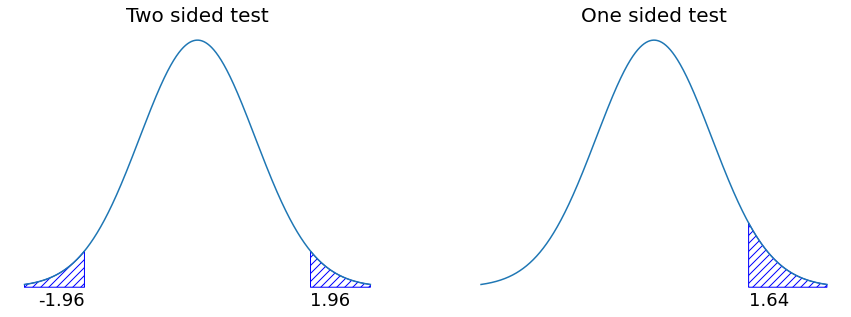

In [254]:
mu = 0
sigma = 1

x = np.arange(-3,3,0.001)
y = stats.norm.pdf(x, mu, sigma)


fig, (ax0, ax1) = plt.subplots(1, 2, sharey = True, figsize=(15, 5))


# Two-sided test
crit = 1.96
p_lower = x[x<crit*-1]
p_upper = x[x>crit]

ax0.plot(x, y)

ax0.fill_between(p_lower, 0, stats.norm.pdf(p_lower, mu, sigma),color="none",hatch="///",edgecolor="b")
ax0.fill_between(p_upper, 0, stats.norm.pdf(p_upper, mu, sigma), color="none",hatch="///",edgecolor="b")
ax0.set_title("Two sided test", size = 20)
ax0.text(-1.96,-.03, '-1.96', size=18, ha="right")
ax0.text(1.96,-.03, '1.96', size=18, ha="left")

# One-sided test
crit = 1.64
p_upper = x[x>crit]

ax1.plot(x, y)
ax1.set_title("One sided test", size = 20)
ax1.text(1.64,-.03, '1.64', size=18, ha="left")
ax1.fill_between(p_upper, 0, stats.norm.pdf(p_upper, mu, sigma), color="none",hatch="///",edgecolor="b")

ax0.set_frame_on(False)
ax1.set_frame_on(False)

ax0.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)


glue("ztest-fig", ax, display=False)

```{glue:figure} ztest-fig
:figwidth: 600px
:name: fig-ztest


Rejection regions for the two-sided z-test (left) and the one-sided z-test (right).

```




And what this meant, way back in the days where people did all their statistics by hand, is that someone could publish a table like this:

|                   || critical z value             |
| :-------------: | :------------: | :------------: |
| desired a level | two-sided test | one-sided test |
|       .1        |    1.644854    |    1.281552    |
|       .05       |    1.959964    |    1.644854    |
|       .01       |    2.575829    |    2.326348    |
|      .001       |    3.290527    |    3.090232    |


which in turn meant that researchers could calculate their $z$-statistic by hand, and then look up the critical value in a text book.  That was an incredibly handy thing to be able to do back then, but it's kind of unnecessary these days, since it's trivially easy to do it with software like Python.

### A worked example using Python

Now, as I mentioned earlier, the $z$-test is almost never used in practice. However, the test is so incredibly simple that it's really easy to do one manually. Let's go back to the data from Dr Zeppo's class. Having loaded the `grades` data, the first thing I need to do is calculate the sample mean:

In [262]:
grades = df['grades']
sample_mean = statistics.mean(grades)
sample_mean

72.3

Then, I create variables corresponding to known population standard deviation ($\sigma = 9.5$), and the value of the population mean that the null hypothesis specifies ($\mu_0 = 67.5$):

In [261]:
sd_true = 9.5
mu_null = 67.5

Let's also create a variable for the sample size. We could count up the number of observations ourselves, and type `N = 20` at the command prompt, but counting is tedious and repetitive. Let's get Python to do the tedious repetitive bit by using the `len()` function, which tells us how many elements there are in a vector:

In [263]:
N = len(grades)
N

20

Next, let's calculate the (true) standard error of the mean:

In [266]:
import math
sem_true = sd_true / math.sqrt(N)
sem_true

2.1242645786248002

And finally, we calculate our $z$-score:

In [268]:
z_score = (sample_mean - mu_null) / sem_true
z_score

2.259605535157681

At this point, we would traditionally look up the value 2.26 in our table of critical values. Our original hypothesis was two-sided (we didn't really have any theory about whether psych students would be better or worse at statistics than other students) so our hypothesis test is two-sided (or two-tailed) also. Looking at the little table that I showed earlier, we can see that 2.26 is bigger than the critical value of 1.96 that would be required to be significant at $\alpha = .05$, but smaller than the value of 2.58 that would be required to be significant at a level of $\alpha = .01$. Therefore, we can conclude that we have a significant effect, which we might write up by saying something like this:

> With a mean grade of 73.2 in the sample of psychology students, and assuming a true population standard deviation of 9.5, we can conclude that the psychology students have significantly different statistics scores to the class average ($z = 2.26$, $N=20$, $p<.05$). 

However, what if want an exact $p$-value? Well, back in the day, the tables of critical values were huge, and so you could look up your actual $z$-value, and find the smallest value of $\alpha$ for which your data would be significant (which, as discussed earlier, is the very definition of a $p$-value). However, looking things up in books is tedious, and typing things into computers is awesome. So let's do it using Python instead. Now, notice that the $\alpha$ level of a $z$-test (or any other test, for that matter) defines the total area "under the curve" for the critical region, right? That is, if we set $\alpha = .05$ for a two-sided test, then the critical region is set up such that the area under the curve for the critical region is $.05$. And, for the $z$-test, the critical value of 1.96 is chosen that way because the area in the lower tail (i.e., below $-1.96$) is exactly $.025$ and the area under the upper tail (i.e., above $1.96$) is exactly $.025$. So, since our observed $z$-statistic is $2.26$, why not calculate the area under the curve below $-2.26$ or above $2.26$? In Python we can calculate this using the `NormalDist().cdf()` method. For the lower tail:

In [286]:
from statistics import NormalDist
lower_area = NormalDist().cdf(-z_score)
lower_area

0.011922871882469877

`NormalDist().cdf()` calculates the "cumulative density function" for a normal distribution. Translated to something slightly less opaque, this means that `NormalDist().cdf()` the probability that a random variable X will be less than or equal to a given value. In our case, the given value for the lower tail of the distribution was our z-score, $2.259$. So `NormalDist().cdf(-z_score)` gives us the probability that a random value draw from a normal distribution would be less than or equal to $-2.259$.

Of course, becauwe we didn't have any particular theory about whether psychology students would do better worse than other students, our test should be two-tailed, that is, we are interested not only in the probability that a random value would be less than or equal to $-2.259$, but also whether it might fall in the upper tail, that is be greater than or equal to $-2.259$.

Since the normal distribution is symmetrical, the upper area under the curve is identical to the lower area, and we can simply add them together to find our exact $p$-value:

In [288]:
lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939753

### Assumptions of the $z$-test{#zassumptions}

As I've said before, all statistical tests make assumptions. Some tests make reasonable assumptions, while other tests do not. The test I've just described -- the one sample $z$-test -- makes three basic assumptions.  These are:

- *Normality*. As usually described, the $z$-test assumes that the true population distribution is normal.^[Actually this is too strong. Strictly speaking the $z$ test only requires that the sampling distribution of the mean be normally distributed; if the population is normal then it necessarily follows that the sampling distribution of the mean is also normal. However, as we saw when talking about the central limit theorem, it's quite possible (even commonplace) for the sampling distribution to be normal even if the population distribution itself is non-normal. However, in light of the sheer ridiculousness of the assumption that the true standard deviation is known, there really isn't much point in going into details on this front!] is often pretty reasonable, and not only that, it's an assumption that we can check if we feel worried about it (see Section \@ref(shapiro)). 
- *Independence*. The second assumption of the test is that the observations in your data set are not correlated with each other, or related to each other in some funny way. This isn't as easy to check statistically: it relies a bit on good experimetal design. An obvious (and stupid) example of something that violates this assumption is a data set where you "copy" the same observation over and over again in your data file: so you end up with a massive "sample size", consisting of only one genuine observation. More realistically, you have to ask yourself if it's really plausible to imagine that each observation is a completely random sample from the population that you're interested in. In practice, this assumption is never met; but we try our best to design studies that minimise the problems of correlated data. 
- *Known standard deviation*. The third assumption of the $z$-test is that the true standard deviation of the population is known to the researcher. This is just stupid. In no real world data analysis problem do you know the standard deviation $\sigma$ of some population, but are completely ignorant about the mean $\mu$. In other words, this assumption is *always* wrong. 

In view of the stupidity of assuming that $\sigma$ is known, let's see if we can live without it. This takes us out of the dreary domain of the $z$-test, and into the magical kingdom of the $t$-test, with unicorns and fairies and leprechauns, and um...

## The one-sample $t$-test{#onesamplettest}

After some thought, I decided that it might not be safe to assume that the psychology student grades necessarily have the same standard deviation as the other students in Dr Zeppo's class. After all, if I'm entertaining the hypothesis that they don't have the same mean, then why should I believe that they absolutely have the same standard deviation? In view of this, I should really stop assuming that I know the true value of $\sigma$. This violates the assumptions of my $z$-test, so in one sense I'm back to square one. However, it's not like I'm completely bereft of options. After all, I've still got my raw data, and those raw data give me an *estimate* of the population standard deviation: 
```{r}
sd( grades )
```
In other words, while I can't say that I know that $\sigma = 9.5$, I *can* say that $\hat\sigma = 9.52$. 

Okay, cool. The obvious thing that you might think to do is run a $z$-test, but using the estimated standard deviation of 9.52 instead of relying on my assumption that the true standard deviation is 9.5. So, we could just type this new number into R and out would come the answer. And you probably wouldn't be surprised to hear that this would still give us a significant result. This approach is close, but it's not *quite* correct. Because we are now relying on an *estimate* of the population standard deviation, we need to make some adjustment for the fact that we have some uncertainty about what the true population standard deviation actually is. Maybe our data are just a fluke ... maybe the true population standard deviation is 11, for instance. But if that were actually true, and we ran the $z$-test assuming $\sigma=11$, then the result would end up being *non-significant*. That's a problem, and it's one we're going to have to address.

```{r ttesthyp_onesample, fig.cap="Graphical illustration of the null and alternative hypotheses assumed by the (two sided) one sample $t$-test. Note the similarity to the $z$-test. The null hypothesis is that the population mean $\\mu$ is equal to some specified value $\\mu_0$, and the alternative hypothesis is that it is not. Like the $z$-test, we assume that the data are normally distributed; but we do not assume that the population standard deviation $\\sigma$ is known in advance.", echo=FALSE}
width <- 12
	height <- 4
	
	plotOne <- function( sigEx ) {

		x <- seq(-4,4,.1)
		y <- dnorm(x,0,1)

		plot.new()
		
		old <- par( no.readonly = TRUE )
		par( mfcol= c(1,2), mfg = c(1,1))

		plot.window( xlim = range(x), 
	             	ylim = range(y)*1.2)

		# plot density
		lines( x ,y, lw =2 )

		# lines and mean
		lines(x=c(0,0), y = c(0,max(y)))
		text(x=0, y = max(y)*1.1, 
	     	labels= expression(mu == mu[0])
		)    

		# sd lines and text
		tmp <- dnorm(-1,0,1)
		lines(x=c(-1,0), y = rep(tmp,2))
		text(x=-2.25, y = tmp, 
	     	labels= sigEx
	     )

		axis(side = 1, labels = F)
		title( main = "null hypothesis", font.main = 1)
		title( xlab = "value of X", mgp = c(1,1,0))

		par( mfg = c(1,2))

		plot.window( xlim = range(x), 
	             ylim = range(y)*1.2)


				y <- dnorm(x,-.75,1)

		# plot density
		lines( x ,y, lw =2 )

		# lines and mean
		lines(x=c(0,0), y = c(0,max(y)))
		text(x=0, y = max(y)*1.1, 
	     	labels= expression(mu != mu[0])
	     )    

		# sd lines and text
		tmp <- dnorm(-1,0,1)
		lines(x=c(-1.75,-.75), y = rep(tmp,2))
		text(x=-3, y = tmp, 
	     	labels= sigEx
	     )

		axis(side = 1, labels = F)
		title( main = "alternative hypothesis", font.main = 1)
		title( xlab = "value of X", mgp = c(1,1,0))

		par(old)
	}
	
	# one sample t-test
	sigEx <- expression(sigma == "??")
	plotOne( sigEx )
```

### Introducing the $t$-test

This ambiguity is annoying, and it was resolved in 1908 by a guy called William Sealy Gosset [@Student1908], who was working as a chemist for the Guinness brewery at the time [see @Box1987]. Because Guinness took a dim view of its employees publishing statistical analysis (apparently they felt it was a trade secret), he published the work under the pseudonym "A Student", and to this day, the full name of the $t$-test is actually **_Student's $t$-test_**. The key thing that Gosset figured out is how we should accommodate the fact that we aren't completely sure what the true standard deviation is.^[Well, sort of. As I understand the history, Gosset only provided a partial solution: the general solution to the problem was provided by Sir Ronald Fisher.] The answer is that it subtly changes the sampling distribution. In the $t$-test, our test statistic (now called a $t$-statistic) is calculated in exactly the same way I mentioned above. If our null hypothesis is that the true mean is $\mu$, but our sample has mean $\bar{X}$ and our estimate of the population standard deviation is $\hat{\sigma}$, then our $t$ statistic is:
$$
t = \frac{\bar{X} - \mu}{\hat{\sigma}/\sqrt{N} }
$$
The only thing that has changed in the equation is that instead of using the known true value $\sigma$, we use the estimate $\hat{\sigma}$. And if this estimate has been constructed from $N$ observations, then the sampling distribution turns into a $t$-distribution with $N-1$ **_degrees of freedom_** (df). The $t$ distribution is very similar to the normal distribution, but has "heavier" tails, as discussed earlier in Section \@ref(otherdists) and illustrated in Figure \@ref(fig:ttestdist). Notice, though, that as df gets larger, the $t$-distribution starts to look identical to the standard normal distribution. This is as it should be: if you have a sample size of $N = 70,000,000$ then your "estimate" of the standard deviation would be pretty much perfect, right? So, you should expect that for large $N$, the $t$-test would behave exactly the same way as a $z$-test. And that's exactly what happens!  

```{r ttestdist, fig.cap="The $t$ distribution with 2 degrees of freedom (left) and 10 degrees of freedom (right), with a standard normal distribution (i.e., mean 0 and std dev 1) plotted as dotted lines for comparison purposes. Notice that the $t$ distribution has heavier tails (higher kurtosis) than the normal distribution; this effect is quite exaggerated when the degrees of freedom are very small, but negligible for larger values. In other words, for large $df$ the $t$ distribution is essentially identical to a normal distribution.", echo=FALSE}
knitr::include_graphics(file.path(projecthome, "img/ttest2/tdist_3.png"))

```

### Doing the test in R

As you might expect, the mechanics of the $t$-test are almost identical to the mechanics of the $z$-test. So there's not much point in going through the tedious exercise of showing you how to do the calculations using low level commands: it's pretty much identical to the calculations that we did earlier, except that we use the estimated standard deviation (i.e., something like `se.est <- sd(grades)`), and then we test our hypothesis using the $t$ distribution rather than the normal distribution  (i.e. we use `pt()` rather than `pnorm()`. And so instead of going through the calculations in tedious detail for a second time, I'll jump straight to showing you how $t$-tests are actually done in practice. 

The situation with $t$-tests is very similar to the one we encountered with chi-squared tests in Chapter \@ref(chisquare). R comes with one function called `t.test()` that is very flexible (it can run lots of different kinds of $t$-tests) and is somewhat terse (the output is quite compressed). Later on in the chapter I'll show you how to use the `t.test()` function (Section \@ref(ttestfunction)), but to start out with I'm going to rely on some simpler functions in the `lsr` package. Just like last time, what I've done is written a few simpler functions, each of which does only one thing. So, if you want to run a one-sample $t$-test, use the `oneSampleTTest()` function! It's pretty straightforward to use: all you need to do is specify `x`, the variable containing the data, and `mu`, the true population mean according to the null hypothesis. All you need to type is this:

```{r}
library(lsr)

oneSampleTTest( x=grades, mu=67.5 )
```
Easy enough. Now lets go through the output. Just like we saw in the last chapter, I've written the functions so that the output is pretty verbose. It tries to describe in a lot of detail what its actually done:
```
   One sample t-test 

Data variable:   grades 

Descriptive statistics: 
            grades
   mean     72.300
   std dev.  9.521

Hypotheses: 
   null:        population mean equals 67.5 
   alternative: population mean not equal to 67.5 

Test results: 
   t-statistic:  2.255 
   degrees of freedom:  19 
   p-value:  0.036 

Other information: 
   two-sided 95% confidence interval:  [67.844, 76.756] 
   estimated effect size (Cohen's d):  0.504 
```
Reading this output from top to bottom, you can see it's trying to lead you through the data analysis process. The first two lines tell you what kind of test was run and what data were used. It then gives you some basic information about the sample: specifically, the sample mean and standard deviation of the data. It then moves towards the inferential statistics part. It starts by telling you what the null and alternative hypotheses were, and then it reports the results of the test: the $t$-statistic, the degrees of freedom, and the $p$-value. Finally, it reports two other things you might care about: the confidence interval for the mean, and a measure of effect size (we'll talk more about effect sizes later). 

So that seems straightforward enough. Now what do we *do* with this output? Well, since we're pretending that we actually care about my toy example, we're overjoyed to discover that the result is statistically significant (i.e. $p$ value below .05). We could report the result by saying something like this:

> With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 ($t(19) = 2.25$, $p<.05$); the 95\% confidence interval is [67.8, 76.8].

where $t(19)$ is shorthand notation for a $t$-statistic that has 19 degrees of freedom. That said, it's often the case that people don't report the confidence interval, or do so using a much more compressed form than I've done here. For instance, it's not uncommon to see the confidence interval included as part of the stat block, like this:

> $t(19) = 2.25$, $p<.05$, CI$_{95} = [67.8, 76.8]$

With that much jargon crammed into half a line, you know it must be really smart.^[More seriously, I tend to think the reverse is true: I get very suspicious of technical reports that fill their results sections with nothing except the numbers. It might just be that I'm an arrogant jerk, but I often feel like an author that makes no attempt to explain and interpret their analysis to the reader either doesn't understand it themselves, or is being a bit lazy. Your readers are smart, but not infinitely patient. Don't annoy them if you can help it.]



### Assumptions of the one sample $t$-test{#ttestoneassumptions}

Okay, so what assumptions does the one-sample $t$-test make? Well, since the $t$-test is basically a $z$-test with the assumption of known standard deviation removed, you shouldn't be surprised to see that it makes the same assumptions as the $z$-test, minus the one about the known standard deviation. That is

- *Normality*. We're still assuming that the the population distribution is normal^[A technical comment... in the same way that we can weaken the assumptions of the $z$-test so that we're only talking about the sampling distribution, we *can* weaken the $t$ test assumptions so that we don't have to assume normality of the population. However, for the $t$-test, it's trickier to do this. As before, we can replace the assumption of population normality with an assumption that the sampling distribution of $\bar{X}$ is normal. However, remember that we're also relying on a sample estimate of the standard deviation; and so we also require the sampling distribution of $\hat{\sigma}$ to be chi-square. That makes things nastier, and this version is rarely used in practice: fortunately, if the population is normal, then both of these two assumptions are met., and as noted earlier, there are standard tools that you can use to check to see if this assumption is met (Section \@ref(shapiro)), and other tests you can do in it's place if this assumption is violated (Section \@ref(wilcox)).
- *Independence*. Once again, we have to assume that the observations in our sample are generated independently of one another. See the earlier discussion about the $z$-test for specifics (Section \@ref(zassumptions)).

Overall, these two assumptions aren't terribly unreasonable, and as a consequence the one-sample $t$-test is pretty widely used in practice as a way of comparing a sample mean against a hypothesised population mean.


## The independent samples $t$-test (Student test){#studentttest}

Although the one sample $t$-test has its uses, it's not the most typical example of a $t$-test^[Although it is the simplest, which is why I started with it.]. A much more common situation arises when you've got two different groups of observations. In psychology, this tends to correspond to two different groups of participants, where each group corresponds to a different condition in your study. For each person in the study, you measure some outcome variable of interest, and the research question that you're asking is whether or not the two groups have the same population mean. This is the situation that the independent samples $t$-test is designed for. 


### The data

Suppose we have 33 students taking Dr Harpo's statistics lectures, and Dr Harpo doesn't grade to a curve. Actually, Dr Harpo's grading is a bit of a mystery, so we don't really know anything about what the average grade is for the class as a whole. There are two tutors for the class, Anastasia and Bernadette. There are $N_1 = 15$ students in Anastasia's tutorials, and $N_2 = 18$ in Bernadette's tutorials. The research question I'm interested in is whether Anastasia or Bernadette is a better tutor, or if it doesn't make much of a difference. Dr Harpo emails me the course grades, in the `harpo.Rdata` file. As usual, I'll load the file and have a look at what variables it contains:
```{r}
load (file.path(projecthome, "data/harpo.Rdata" ))
str(harpo)
```
As we can see, there's a single data frame with two variables, `grade` and `tutor`. The `grade` variable is a numeric vector, containing the grades for all $N = 33$ students taking Dr Harpo's class; the `tutor` variable is a factor that indicates who each student's tutor was. The first six observations in this data set are shown below:
```{r}
head( harpo )
```
We can calculate means and standard deviations, using the `mean()` and `sd()` functions. Rather than show the R output, here's a nice little summary table:

```{r echo=FALSE}
knitr::kable(tibble::tribble(
                        ~V1,       ~V2,         ~V3,    ~V4,
   "Anastasia's students", "74.53",    "9.00", "15",
   "Bernadette's students", "69.06",    "5.77",  "18"
  ), col.names = c("",  "mean", "std dev",  "N"), align="lccc")
```

To give you a more detailed sense of what's going on here, I've plotted histograms showing the distribution of grades for both tutors (Figure \@ref(fig:harpohistanastasia) and \@ref(fig:harpohistbernadette)). Inspection of these histograms suggests that the students in Anastasia's class may be getting slightly better grades on average, though they also seem a little more variable.

```{r harpohistanastasia, fig.cap="Histogram showing the overall distribution of grades for students in Anastasia's class", echo=FALSE}
  plotHist(harpo$grade[harpo$tutor == "Anastasia"],
           xlim=c(50,100),xlab="Grade", main="Anastasia's students",
           font.main=1,breaks=seq(50,100,5), ylim=c(0,7))
```

```{r harpohistbernadette, fig.cap="Histogram showing the overall distribution of grades for students in Bernadette's class", echo=FALSE}
  plotHist(harpo$grade[harpo$tutor == "Bernadette"],
           xlim=c(50,100),xlab="Grade", main="Bernadette's students",
           font.main=1,breaks=seq(50,100,5), ylim=c(0,7))
```

Here is a simpler plot showing the means and corresponding confidence intervals for both groups of students (Figure \@ref(fig:ttestci)).

```{r ttestci, fig.cap="Plots showing the mean grade for the students in Anastasia's and Bernadette's tutorials. Error bars depict 95% confidence intervals around the mean. On the basis of visual inspection, it does look like there's a real difference between the groups, though it's hard to say for sure.", echo=FALSE}
knitr::include_graphics(file.path(projecthome, "img/ttest2/ttestci.png"))

```

### Introducing the test

The **_independent samples $t$-test_** comes in two different forms, Student's and Welch's. The original Student $t$-test -- which is the one I'll describe in this section -- is the simpler of the two, but relies on much more restrictive assumptions than the Welch $t$-test. Assuming for the moment that you want to run a two-sided test, the goal is to determine whether two "independent samples" of data are drawn from populations with the same mean (the null hypothesis) or different means (the alternative hypothesis). When we say "independent" samples, what we really mean here is that there's no special relationship between observations in the two samples. This probably doesn't make a lot of sense right now, but it will be clearer when we come to talk about the paired samples $t$-test later on. For now, let's just point out that if we have an experimental design where participants are randomly allocated to one of two groups, and we want to compare the two groups' mean performance on some outcome measure, then an independent samples $t$-test (rather than a paired samples $t$-test) is what we're after.

Okay, so let's let $\mu_1$ denote the true population mean for group 1 (e.g., Anastasia's students), and $\mu_2$ will be the true population mean for group 2 (e.g., Bernadette's students),^[A funny question almost always pops up at this point: what the heck *is* the population being referred to in this case? Is it the set of students actually taking Dr Harpo's class (all 33 of them)? The set of people who might take the class (an unknown number) of them? Or something else? Does it matter which of these we pick? It's traditional in an introductory behavioural stats class to mumble a lot at this point, but since I get asked this question every year by my students, I'll give a brief answer. Technically yes, it does matter: if you change your definition of what the "real world" population actually is, then the sampling distribution of your observed mean $\bar{X}$ changes too. The $t$-test relies on an assumption that the observations are sampled at random from an infinitely large population; and to the extent that real life isn't like that, then the $t$-test can be wrong. In practice, however, this isn't usually a big deal: even though the assumption is almost always wrong, it doesn't lead to a lot of pathological behaviour from the test, so we tend to just ignore it.] and as usual we'll let $\bar{X}_1$ and $\bar{X}_2$ denote the observed sample means for both of these groups. Our null hypothesis states that the two population means are identical ($\mu_1 = \mu_2$) and the alternative to this is that they are not ($\mu_1 \neq \mu_2$). Written in mathematical-ese, this is...
$$
\begin{array}{ll}
H_0: & \mu_1 = \mu_2  \\
H_1: & \mu_1 \neq \mu_2
\end{array}
$$

```{r ttesthyp, fig.cap="Graphical illustration of the null and alternative hypotheses assumed by the Student $t$-test. The null hypothesis assumes that both groups have the same mean $\\mu$, whereas the alternative assumes that they have different means $\\mu_1$ and $\\mu_2$. Notice that it is assumed that the population distributions are normal, and that, although the alternative hypothesis allows the group to have different means, it assumes they have the same standard deviation", echo=FALSE}

	
	width <- 12
	height <- 4

	plotOne <- function( sd1 ) {
 
		Grade <- 40:100

		mu1 <- c(60, 75)
		mu0 <- 70
		sd0 <- 9

		plot.new()   # new figure window

		old <- par( no.readonly = TRUE )
	
		par( mfcol = c(1,2),  # array of two plots
	     	mfg = c(1,1) )   # start on the left

		ymax <- .07
		plot.window( xlim = range(Grade),
	        ylim = c(0, ymax)
	  	)

		# null distribution
		lines( x = Grade, 
	       y = ynull <- dnorm(Grade, mu0, sd0), 
	       lw = 2 )

		axis(side = 1, at = seq(40,100,10), labels = F)

		text(x = mu0, y = max(ynull)*1.1, 
	     expression(mu) , cex = 1.2)

		title( main = "null hypothesis", font.main = 1)
		title( xlab = "value of X", mgp = rep(1,3))

		par( mfg = c(1,2) ) 
		plot.window( xlim = range(Grade),
	             ylim = c(0, ymax) )


		# alternative distributions
		lines( x = Grade, 
	       y = ya1 <- dnorm(Grade, mu1[1], sd1[1]), 
	       lw = 2 )

		lines( x = Grade, 
	       y = ya2 <- dnorm(Grade, mu1[2], sd1[2]), 
	       lw = 2 )

		axis(side = 1, at = seq(40,100,10), labels = F)

		text(x = mu1[1], y = max(ya1)*1.1, 
	     expression(mu[1]) , cex = 1.2)
		text(x = mu1[2], y = max(ya2)*1.1, 
	     expression(mu[2]) , cex = 1.2)
	

		title( main = "alternative hypothesis", font.main = 1)
		title( xlab = "value of X", mgp = rep(1,3))
	
		par(old)
	
	}

	# print 
	sd1 <- c(6.5, 6.5)
	plotOne( sd1 )
```

To construct a hypothesis test that handles this scenario, we start by noting that if the null hypothesis is true, then the difference between the population means is *exactly* zero, 
$\mu_1 - \mu_2 = 0$
As a consequence, a diagnostic test statistic will be based on the difference between the two sample means. Because if the null hypothesis is true, then we'd expect 
$$
\bar{X}_1 - \bar{X}_2
$$
to be *pretty close* to zero. However, just like we saw with our one-sample tests (i.e., the one-sample $z$-test and the one-sample $t$-test) we have to be precise about exactly *how close* to zero this difference should be. And the solution to the problem is more or less the same one: we calculate a standard error estimate (SE), just like last time, and then divide the difference between means by this estimate. So our **_$t$-statistic_** will be of the form
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\mbox{SE}}
$$
We just need to figure out what this standard error estimate actually is. This is a bit trickier than was the case for either of the two tests we've looked at so far, so we need to go through it a lot more carefully to understand how it works.

### A "pooled estimate" of the standard deviation

In the original "Student $t$-test", we make the assumption that the two groups have the same population standard deviation: that is, regardless of whether the population means are the same, we assume that the population standard deviations are identical, $\sigma_1 = \sigma_2$. Since we're assuming that the two standard deviations are the same, we drop the subscripts and refer to both of them as $\sigma$. How should we estimate this? How should we construct a single estimate of a standard deviation when we have two samples? The answer is, basically, we average them. Well, sort of. Actually, what we do is take a *weighed* average of the *variance* estimates, which we use as our **_pooled estimate of the variance_**. The weight assigned to each sample is equal to the number of observations in that sample, minus 1. Mathematically, we can write this as
$$
\begin{array}{rcl}
w_1 &=& N_1 - 1\\
w_2 &=& N_2 - 1
\end{array}
$$
Now that we've assigned weights to each sample, we calculate the pooled estimate of the variance by taking the weighted average of the two variance estimates, ${\hat\sigma_1}^2$ and ${\hat\sigma_2}^2$ 
$$
\hat\sigma^2_p = \frac{w_1 {\hat\sigma_1}^2 + w_2 {\hat\sigma_2}^2}{w_1 + w_2}
$$
Finally, we convert the pooled variance estimate to a pooled standard deviation estimate, by taking the square root. This gives us the following formula for $\hat\sigma_p$,
$$
\hat\sigma_p = \sqrt{\frac{w_1 {\hat\sigma_1}^2 + w_2 {\hat\sigma_2}^2}{w_1 + w_2}}
$$
And if you mentally substitute $w_1 = N_1 -1$ and $w_2 = N_2 -1$ into this equation you get a very ugly looking formula; a very ugly formula that actually seems to be the "standard" way of describing the pooled standard deviation estimate. It's not my favourite way of thinking about pooled standard deviations, however.^[Yes, I  have a "favourite" way of thinking about pooled standard deviation estimates. So what?] 

### The same pooled estimate, described differently

I prefer to think about it like this. Our data set actually corresponds to a set of $N$ observations, which are sorted into two groups. So let's use the notation $X_{ik}$ to refer to the grade received by the $i$-th student in the $k$-th tutorial group: that is, $X_{11}$ is the grade received by the first student in Anastasia's class, $X_{21}$ is her second student, and so on. And we have two separate group means $\bar{X}_1$ and $\bar{X}_2$, which we could "generically" refer to using the notation $\bar{X}_k$, i.e., the mean grade for the $k$-th tutorial group. So far, so good. Now, since every single student falls into one of the two tutorials, and so we can describe their deviation from the group mean as the difference
$$
X_{ik} - \bar{X}_k
$$
So why not just use these deviations (i.e., the extent to which each student's grade differs from the mean grade in their tutorial?) Remember, a variance is just the average of a bunch of squared deviations, so let's do that. Mathematically, we could write it like this:
$$
\frac{\sum_{ik} \left( X_{ik} - \bar{X}_k \right)^2}{N}
$$
where the notation "$\sum_{ik}$" is a lazy way of saying "calculate a sum by looking at all students in all tutorials", since each "$ik$" corresponds to one student.^[A more correct notation will be introduced in Chapter \@ref(anova).] But, as we saw in Chapter \@ref(estimation), calculating the variance by dividing by $N$ produces a biased estimate of the population variance. And previously, we needed to divide by $N-1$ to fix this. However, as I mentioned at the time, the reason why this bias exists is because the variance estimate relies on the sample mean; and to the extent that the sample mean isn't equal to the population mean, it can systematically bias our estimate of the variance. But this time we're relying on *two* sample means! Does this mean that we've got more bias? Yes, yes it does. And does this mean we now need to divide by $N-2$ instead of $N-1$, in order to calculate our pooled variance estimate? Why, yes...
$$
\hat\sigma^2_p = \frac{\sum_{ik} \left( X_{ik} - \bar{X}_k \right)^2}{N -2}
$$
Oh, and if you take the square root of this then you get $\hat{\sigma}_p$, the pooled standard deviation estimate. In other words, the pooled standard deviation calculation is nothing special: it's not terribly different to the regular standard deviation calculation. 


### Completing the test

Regardless of which way you want to think about it, we now have our pooled estimate of the standard deviation. From now on, I'll drop the silly $p$ subscript, and just refer to this estimate as $\hat\sigma$. Great. Let's now go back to thinking about the bloody hypothesis test, shall we? Our whole reason for calculating this pooled estimate was that we knew it would be helpful when calculating our *standard error* estimate. But, standard error of *what*? In the one-sample $t$-test, it was the standard error of the sample mean, $\mbox{SE}({\bar{X}})$, and since $\mbox{SE}({\bar{X}}) = \sigma / \sqrt{N}$ that's what the denominator of our $t$-statistic looked like. This time around, however, we have *two* sample means. And what we're interested in, specifically, is the the difference between the two $\bar{X}_1 - \bar{X}_2$. As a consequence, the standard error that we need to divide by is in fact the **_standard error of the difference_** between means. As long as the two variables really do have the same standard deviation, then our estimate for the standard error is
$$
\mbox{SE}({\bar{X}_1 - \bar{X}_2}) = \hat\sigma \sqrt{\frac{1}{N_1} + \frac{1}{N_2}}
$$
and our $t$-statistic is therefore 
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\mbox{SE}({\bar{X}_1 - \bar{X}_2})}
$$
Just as we saw with our one-sample test, the sampling distribution of this $t$-statistic is a $t$-distribution (shocking, isn't it?) as long as the null hypothesis is true, and all of the assumptions of the test are met. The degrees of freedom, however, is slightly different. As usual, we can think of the degrees of freedom to be equal to the number of data points minus the number of constraints. In this case, we have $N$ observations ($N_1$ in sample 1, and $N_2$ in sample 2), and 2 constraints (the sample means). So the total degrees of freedom for this test are $N-2$. 


### Doing the test in R

Not surprisingly, you can run an independent samples $t$-test using the `t.test()` function (Section \@ref(ttestfunction)), but once again I'm going to start with a somewhat simpler function in the `lsr` package. That function is unimaginatively called `independentSamplesTTest()`. First, recall that our data look like this: 
```{r}
head( harpo )
```
The outcome variable for our test is the student `grade`, and the groups are defined in terms of the `tutor` for each class. So you probably won't be too surprised to see that we're going to describe the test that we want in terms of an R formula that reads like this `grade ~ tutor`. The specific command that we need is:
```{r}
independentSamplesTTest( 
      formula = grade ~ tutor,  # formula specifying outcome and group variables
      data = harpo,             # data frame that contains the variables
      var.equal = TRUE          # assume that the two groups have the same variance
  )
```
The first two arguments should be familiar to you. The first one is the formula that tells R what variables to use and the second one tells R the name of the data frame that stores those variables. The third argument is not so obvious. By saying `var.equal = TRUE`, what we're really doing is telling R to use the *Student* independent samples $t$-test. More on this later. For now, lets ignore that bit and look at the output:

The output has a very familiar form. First, it tells you what test was run, and it tells you the names of the variables that you used. The second part of the output reports the sample means and standard deviations for both groups (i.e., both tutorial groups). The third section of the output states the null hypothesis and the alternative hypothesis in a fairly explicit form. It then reports the test results: just like last time, the test results consist of a $t$-statistic, the degrees of freedom, and the $p$-value. The final section reports two things: it gives you a confidence interval, and an effect size. I'll talk about effect sizes later. The confidence interval, however, I should talk about now. 

It's pretty important to be clear on what this confidence interval actually refers to: it is a confidence interval for the *difference* between the group means. In our example, Anastasia's students had an average grade of 74.5, and Bernadette's students had an average grade of 69.1, so the difference between the two sample means is 5.4. But of course the difference between population means might be bigger or smaller than this. The confidence interval reported by the `independentSamplesTTest()` function tells you that there's a 95\% chance that the true difference between means lies between 0.2 and 10.8.  

In any case, the difference between the two groups is significant (just barely), so we might write up the result using text like this:

> The mean grade in Anastasia's class was 74.5\% (std dev = 9.0), whereas the mean in Bernadette's class was 69.1\% (std dev = 5.8). A Student's independent samples $t$-test showed that this 5.4\% difference was significant ($t(31) = 2.1$, $p<.05$, $CI_{95} = [0.2, 10.8]$, $d = .74$), suggesting that a genuine difference in learning outcomes has occurred.  

Notice that I've included the confidence interval and the effect size in the stat block. People don't always do this. At a bare minimum, you'd expect to see the $t$-statistic, the degrees of freedom and the $p$ value. So you should include something like this at a minimum: $t(31) = 2.1$, $p<.05$. If statisticians had their way, everyone would also report the confidence interval and probably the effect size measure too, because they are useful things to know. But real life doesn't always work the way statisticians want it to: you should make a judgment based on whether you think it will help your readers, and (if you're writing a scientific paper) the editorial standard for the journal in question. Some journals expect you to report effect sizes, others don't. Within some scientific communities it is standard practice to report confidence intervals, in other it is not. You'll need to figure out what your audience expects. But, just for the sake of clarity, if you're taking my class: my default position is that it's usually worth includng the effect size, but don't worry about the confidence interval unless the assignment asks you to or implies that you should.

 
### Positive and negative $t$ values

Before moving on to talk about the assumptions of the $t$-test, there's one additional point I want to make about the use of $t$-tests in practice. The first one relates to the sign of the $t$-statistic (that is, whether it is a positive number or a negative one).  One very common worry that students have when they start running their first $t$-test is that they often end up with negative values for the $t$-statistic, and don't know how to interpret it. In fact, it's not at all uncommon for two  people working independently to end up with R outputs that are almost identical, except that one person has a negative $t$ values and the other one has a positive $t$ value. Assuming that  you're running a two-sided test, then the $p$-values will be identical. On closer inspection, the students will notice that the confidence intervals also have the opposite signs. This is perfectly okay: whenever this happens, what you'll find is that the two versions of the R output arise from slightly different ways of running the $t$-test. What's happening here is very simple. The $t$-statistic that R is calculating here is always of the form 
$$
t = \frac{\mbox{(mean 1)} -\mbox{(mean 2)}}{ \mbox{(SE)}}
$$
If "mean 1" is larger than "mean 2" the $t$ statistic will be positive, whereas if "mean 2" is larger then the $t$ statistic will be negative. Similarly, the confidence interval that R reports is the confidence interval for the difference "(mean 1) minus (mean 2)", which will be the reverse of what you'd get if you were calculating the confidence interval for the difference "(mean 2) minus (mean 1)".

Okay, that's pretty straightforward when you think about it, but now consider our $t$-test comparing Anastasia's class to Bernadette's class. Which one should we call "mean 1" and which one should we call "mean 2". It's arbitrary. However, you really do need to designate one of them as "mean 1" and the other one as "mean 2". Not surprisingly, the way that R handles this is also pretty arbitrary. In earlier versions of the book I used to try to explain it, but after a while I gave up, because it's not really all that important, and to be honest I can never remember myself. Whenever I get a significant $t$-test result, and I want to figure out which mean is the larger one, I don't try to figure it out by looking at the $t$-statistic. Why would I bother doing that? It's foolish. It's easier just look at the actual group means, since the R output actually shows them!


Here's the important thing. Because it really doesn't matter what R printed out, I usually try to *report* the $t$-statistic in such a way that the numbers match up with the text. Here's what I mean... suppose that what I want to write in my report is "Anastasia's class had higher  grades than Bernadette's class". The phrasing here implies that Anastasia's group comes first, so it makes sense to report the $t$-statistic as if Anastasia's class corresponded to group 1. If so, I would write 

>Anastasia's class had *higher* grades than Bernadette's class ($t(31)= 2.1, p=.04$). 

(I wouldn't actually emphasise the word "higher" in real life, I'm just doing it to emphasise the point that "higher" corresponds to positive $t$ values). On the other hand, suppose the phrasing I wanted to use has Bernadette's class listed first. If so, it makes more sense to treat her class as group 1, and if so, the write up looks like this:

> Bernadette's class had *lower* grades than Anastasia's class ($t(31)= -2.1, p=.04$). 

Because I'm talking about one group having "lower" scores this time around, it is more sensible to use the negative form of the $t$-statistic. It just makes it read more cleanly.

One last thing: please note that you *can't* do this for other types of test statistics. It works for $t$-tests, but it wouldn't be meaningful for  chi-square testsm $F$-tests or indeed for most of the tests I talk about in this book. So don't overgeneralise this advice! I'm really just talking about $t$-tests here and nothing else!
 
 
### Assumptions of the test{#studentassumptions}

As always, our hypothesis test relies on some assumptions. So what are they? For the Student t-test there are three assumptions, some of which we saw previously in the context of the one sample $t$-test (see Section \@ref(ttestoneassumptions)):


- *Normality*. Like the one-sample $t$-test, it is assumed that the data are normally distributed. Specifically, we assume that both groups are normally distributed. In Section \@ref(shapiro) we'll discuss how to test for normality, and in Section \@ref(wilcox) we'll discuss possible solutions.
- *Independence*. Once again, it is assumed that the observations are independently sampled. In the context of the Student test this has two aspects to it. Firstly, we assume that the observations within each sample are independent of one another (exactly the same as for the one-sample test). However, we also assume that there are no cross-sample dependencies. If, for instance, it turns out that you included some participants in both experimental conditions of your study (e.g., by accidentally allowing the same person to sign up to different conditions), then there are some cross sample dependencies that you'd need to take into account.
- *Homogeneity of variance* (also called "homoscedasticity"). The third assumption is that the population standard deviation is the same in both groups. You can test this assumption using the Levene test, which I'll talk about later on in the book (Section \@ref(levene)). However, there's a very simple remedy for this assumption, which I'll talk about in the next section.






## The independent samples $t$-test (Welch test){#welchttest}

The biggest problem with using the Student test in practice is the third assumption listed in the previous section: it assumes that both groups have the same standard deviation. This is rarely true in real life: if two samples don't have the same means, why should we expect them to have the same standard deviation? There's really no reason to expect this assumption to be true. We'll talk a little bit about how you can check this assumption later on because it does crop up in a few different places, not just the $t$-test. But right now I'll talk about a different form of the $t$-test [@Welch1947] that does not rely on this assumption. A graphical illustration of what the **_Welch $t$ test_** assumes about the data is shown in Figure \@ref(fig:ttesthyp2), to provide a contrast with the Student test version in Figure \@ref(fig:ttesthyp). I'll admit it's a bit odd to talk about the cure before talking about the diagnosis, but as it happens the Welch test is the default $t$-test in R, so this is probably the best place to discuss it. 

The Welch test is very similar to the Student test. For example, the $t$-statistic that we use in the Welch test is calculated in much the same way as it is for the Student test. That is, we take the difference between the sample means, and then divide it by some estimate of the standard error of that difference:
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\mbox{SE}({\bar{X}_1 - \bar{X}_2})}
$$
The main difference is that the standard error calculations are different. If the two populations have different standard deviations, then it's a complete nonsense to try to calculate a pooled standard deviation estimate, because you're averaging apples and oranges.^[Well, I guess you can average apples and oranges, and what you end up with is a delicious fruit smoothie. But no one really thinks that a fruit smoothie is a very good way to describe the original fruits, do they?] But you can still estimate the standard error of the difference between sample means; it just ends up looking different:
$$
\mbox{SE}({\bar{X}_1 - \bar{X}_2}) = \sqrt{ \frac{{\hat{\sigma}_1}^2}{N_1} + \frac{{\hat{\sigma}_2}^2}{N_2} }
$$
The reason why it's calculated this way is beyond the scope of this book. What matters for our purposes is that the $t$-statistic that comes out of the Welch test is actually somewhat different to the one that comes from the Student test. 

The second difference between Welch and Student is that the degrees of freedom are calculated in a very different way. In the Welch test, the "degrees of freedom " doesn't have to be a whole number any more, and it doesn't correspond all that closely to the "number of data points minus the number of constraints" heuristic that I've been using up to this point. The degrees of freedom are, in fact...
$$
\mbox{df} = \frac{ ({\hat{\sigma}_1}^2 / N_1 + {\hat{\sigma}_2}^2 / N_2)^2 }{  ({\hat{\sigma}_1}^2 / N_1)^2 / (N_1 -1 )  + ({\hat{\sigma}_2}^2 / N_2)^2 / (N_2 -1 ) } 
$$
... which is all pretty straightforward and obvious, right? Well, perhaps not. It doesn't really matter for out purposes. What matters is that you'll see that the "df" value that pops out of a Welch test tends to be a little bit smaller than the one used for the Student test, and it doesn't have to be a whole number. 

```{r ttesthyp2, fig.cap="Graphical illustration of the null and alternative hypotheses assumed by the Welch $t$-test. Like the Student test we assume that both samples are drawn from a normal population; but the alternative hypothesis no longer requires the two populations to have equal variance.", echo=FALSE}
	width <- 12
	height <- 4

	plotOne <- function( sd1 ) {
 
		Grade <- 40:100

		mu1 <- c(60, 75)
		mu0 <- 70
		sd0 <- 9

		plot.new()   # new figure window

		old <- par( no.readonly = TRUE )
	
		par( mfcol = c(1,2),  # array of two plots
	     	mfg = c(1,1) )   # start on the left

		ymax <- .07
		plot.window( xlim = range(Grade),
	        ylim = c(0, ymax)
	  	)

		# null distribution
		lines( x = Grade, 
	       y = ynull <- dnorm(Grade, mu0, sd0), 
	       lw = 2 )

		axis(side = 1, at = seq(40,100,10), labels = F)

		text(x = mu0, y = max(ynull)*1.1, 
	     expression(mu) , cex = 1.2)

		title( main = "null hypothesis", font.main = 1)
		title( xlab = "value of X", mgp = rep(1,3))

		par( mfg = c(1,2) ) 
		plot.window( xlim = range(Grade),
	             ylim = c(0, ymax) )


		# alternative distributions
		lines( x = Grade, 
	       y = ya1 <- dnorm(Grade, mu1[1], sd1[1]), 
	       lw = 2 )

		lines( x = Grade, 
	       y = ya2 <- dnorm(Grade, mu1[2], sd1[2]), 
	       lw = 2 )

		axis(side = 1, at = seq(40,100,10), labels = F)

		text(x = mu1[1], y = max(ya1)*1.1, 
	     expression(mu[1]) , cex = 1.2)
		text(x = mu1[2], y = max(ya2)*1.1, 
	     expression(mu[2]) , cex = 1.2)
	

		title( main = "alternative hypothesis", font.main = 1)
		title( xlab = "value of X", mgp = rep(1,3))
	
		par(old)
	
	}


	# print 
	sd1 <- c(6.5, 7.95)
	plotOne( sd1 )
```

### Doing the test in R

To run a Welch test in R is pretty easy. All you have to do is not bother telling R to assume equal variances. That is, you take the command we used to run a Student's $t$-test and drop the `var.equal = TRUE` bit. So the command for a Welch test becomes:
```{r}
independentSamplesTTest( 
      formula = grade ~ tutor,  # formula specifying outcome and group variables
      data = harpo              # data frame that contains the variables
  )
```
Not too difficult, right? Not surprisingly, the output has exactly the same format as it did last time too:

The very first line is different, because it's telling you that its run a Welch test rather than a Student test, and of course all the numbers are a bit different. But I hope that the interpretation of this output should be fairly obvious. You read the output in the same way that you would for the Student test. You've got your descriptive statistics, the hypotheses, the test results and some other information. So that's all pretty easy. 

Except, except... our result isn't significant anymore. When we ran the Student test, we did get a significant effect; but the Welch test on the same data set is not ($t(23.03) = 2.03$, $p = .054$). What does this mean? Should we panic? Is the sky burning? Probably not. The fact that one test is significant and the other isn't doesn't itself mean very much, especially since I kind of rigged the data so that this would happen. As a general rule, it's not a good idea to go out of your way to try to interpret or explain the difference between a $p$-value of .049 and a $p$-value of .051. If this sort of thing happens in real life, the *difference* in these $p$-values is almost certainly due to chance. What does matter is that you take a little bit of care in thinking about what test you use. The Student test and the Welch test have different strengths and weaknesses. If the two populations really do have equal variances, then the Student test is slightly more powerful (lower Type II error rate) than the Welch test. However, if they *don't* have the same variances, then the assumptions of the Student test are violated and you may not be able to trust it: you might end up with a higher Type I error rate. So it's a trade off. However, in real life, I tend to prefer the Welch test; because almost no-one *actually* believes that the population variances are identical.


### Assumptions of the test

The assumptions of the Welch test are very similar to those made by the Student $t$-test (see Section \@ref(studentassumptions)), except that the Welch test does not assume homogeneity of variance. This leaves only the assumption of normality, and the assumption of independence. The specifics of these assumptions are the same for the Welch test as for the Student test. 

## The paired-samples $t$-test{#pairedsamplesttest}

Regardless of whether we're talking about the Student test or the Welch test, an independent samples $t$-test is intended to be used in a situation where you have two samples that are, well, independent of one another. This situation arises naturally when participants are assigned randomly to one of two experimental conditions, but it provides a very poor approximation to other sorts of research designs. In particular, a repeated measures design -- in which each participant is measured (with respect to the same outcome variable) in both experimental conditions -- is not suited for analysis using independent samples $t$-tests. For example, we might be interested in whether listening to music reduces people's working memory capacity. To that end, we could measure each person's working memory capacity in two conditions: with music, and without music. In an experimental design such as this one,^[This design is very similar to the one in Section \@ref(mcnemar) that motivated the McNemar test. This should be no surprise. Both are standard repeated measures designs involving two measurements. The only difference is that this time our outcome variable is interval scale (working memory capacity) rather than a binary, nominal scale variable (a yes-or-no question).] each participant appears in *both* groups. This requires us to approach the problem in a different way; by using the **_paired samples $t$-test_**. 

### The data

The data set that we'll use this time comes from Dr Chico's class.^[At this point we have Drs Harpo, Chico and Zeppo. No prizes for guessing who Dr Groucho is.] In her class, students take two major tests, one early in the semester and one later in the semester. To hear her tell it, she runs a very hard class, one that most students find very challenging; but she argues that by setting hard assessments, students are encouraged to work harder. Her theory is that the first test is a bit of a "wake up call" for students: when they realise how hard her class really is, they'll work harder for the second test and get a better mark. Is she right? To test this, let's have a look at the `chico.Rdata` file: 
```{r}
load( file.path(projecthome, "data/chico.Rdata" ))
str(chico)     
```
The data frame `chico` contains three variables: an `id` variable that identifies each student in the class, the `grade_test1` variable that records the student grade for the first test, and the `grade_test2` variable that has the grades for the second test. Here's the first six students:
```{r}
head( chico )
```
At a glance, it does seem like the class is a hard one (most grades are between 50\% and 60\%), but it does look like there's an improvement from the first test to the second one. If we take a quick look at the descriptive statistics
```{r}
library( psych )
describe( chico )
```
we see that this impression seems to be supported. Across all 20 students^[This is obviously a class being taught at a very small or very expensive university, or else is a postgraduate class. *I've* never taught an intro stats class with less than 350 students.] the mean grade for the first test is 57\%, but this rises to 58\% for the second test. Although, given that the standard deviations are 6.6\% and 6.4\% respectively, it's starting to feel like maybe the improvement is just illusory; maybe just random variation. This impression is reinforced when you see the means and confidence intervals plotted in Figure \@ref(fig:pairedta). If we were to rely on this plot alone, we'd come to the same conclusion that we got from looking at the descriptive statistics that the `describe()` function produced. Looking at how wide those confidence intervals are, we'd be tempted to think that the apparent improvement in student performance is pure chance.

```{r pairedta, fig.cap="Mean grade for test 1 and test 2, with associated 95% confidence intervals", echo=FALSE}
chico2 <- wideToLong( data=chico, within="time")
  
  gplots::plotmeans( formula = grade ~ time,    # plot grade by test time
             data = chico2,             # data frame
             n.label = FALSE,           # don't show sample size
             xlab = "Testing Instance", # x-axis label
             ylab = "Grade"             # y-axis label
  )

```

Nevertheless, this impression is wrong. To see why, take a look at the scatterplot of the grades for test 1 against the grades for test 2.  shown in Figure \@ref(fig:pairedtb). 


```{r pairedtb, fig.cap="Scatterplot showing the individual grades for test 1 and test 2", echo=FALSE}
  # first draw the basic scatterplot...
  plot( x = chico$grade_test1,     # test 1 on the x-axis
        y = chico$grade_test2,     # test 2 on the y-axis
        xlab = "Grade for Test 1", # x-axis label
        ylab = "Grade for Test 2", # y-axis label
        pch = 19                   # solid dots as markers
  )
  
  # now add the line...
  abline( a = 0, # line has an intercept at 0
          b = 1 # and a slope of 1 
  )
```

In this plot, each dot corresponds to the two grades for a given student: if their grade for test 1 ($x$ co-ordinate) equals their grade for test 2 ($y$ co-ordinate), then the dot falls on the line. Points falling above the line are the students that performed better on the second test. Critically, almost all of the data points fall above the diagonal line: almost all of the students *do* seem to have improved their grade, if only by a small amount. This suggests that we should be looking at the *improvement* made by each student from one test to the next, and treating that as our raw data. To do this, we'll need to create a new variable for the `improvement` that each student makes, and add it to the `chico` data frame. The easiest way to do this is as follows: 
```{r}
chico$improvement <- chico$grade_test2 - chico$grade_test1 
```
Notice that I assigned the output to a variable called `chico$improvement`. That has the effect of creating a new variable called `improvement` inside the `chico` data frame. So now when I look at the `chico` data frame, I get an output that looks like this:
```{r}
head( chico )
```
Now that we've created and stored this `improvement` variable, we can draw a histogram showing the distribution of these improvement scores (using the `hist()` function), shown in Figure \@ref(fig:pairedtc). 

```{r pairedtc, fig.cap="Histogram showing the improvement made by each student in Dr Chico's class. Notice that almost the entire distribution is above zero: the vast majority of students did improve their performance from the first test to the second one", echo=FALSE}
chico3 <- within(chico, improvement <- grade_test2 - grade_test1)
  
  # hist
  hist( x = chico3$improvement,        # data to plot
        xlab = "Improvement in Grade", # x-axis label
        main = "",                     # no title
        border = "white",              # white borders on the bars
        col = rgb(.5,.5,1)             # light blue fill colour
  )

```

When we look at histogram, it's very clear that there *is* a real improvement here. The vast majority of the students scored higher on the test 2 than on test 1, reflected in the fact that almost the entire histogram is above zero. In fact, if we use `ciMean()` to compute a confidence interval for the population mean of this new variable, 
```{r}
ciMean( x = chico$improvement )
```
we see that it is 95\% certain that the true (population-wide) average improvement would lie between 0.95\% and 1.86\%. So you can see, qualitatively, what's going on: there is a real "within student" improvement (everyone improves by about 1\%), but it is very small when set against the quite large "between student" differences (student grades vary by about 20\% or so). 


### What is the paired samples $t$-test?

In light of the previous exploration, let's think about how to construct an appropriate $t$ test. One possibility would be to try to run an independent samples $t$-test using `grade_test1` and `grade_test2` as the variables of interest. However, this is clearly the wrong thing to do: the independent samples $t$-test assumes that there is no particular relationship between the two samples. Yet clearly that's not true in this case, because of the repeated measures structure to the data. To use the language that I introduced in the last section, if we were to try to do an independent samples $t$-test, we would be conflating the **_within subject_** differences (which is what we're interested in testing) with the **_between subject_** variability (which we are not). 

The solution to the problem is obvious, I hope, since we already did all the hard work in the previous section. Instead of running an independent samples $t$-test on `grade_test1` and `grade_test2`, we run a *one-sample* $t$-test on the within-subject difference variable, `improvement`. To formalise this slightly, if $X_{i1}$ is the score that the $i$-th participant obtained on the first variable, and $X_{i2}$ is the score that the same person obtained on the second one, then the difference score is:
$$
D_{i} = X_{i1} - X_{i2} 
$$
Notice that the difference scores is *variable 1 minus variable 2* and not the other way around, so if we want improvement to correspond to a positive valued difference, we actually want "test 2" to be our "variable 1". Equally, we would say that $\mu_D = \mu_1 - \mu_2$ is the population mean for this difference variable. So, to convert this to a hypothesis test, our null hypothesis is that this mean difference is zero; the alternative hypothesis is that it is not:
$$
\begin{array}{ll}
H_0: & \mu_D = 0  \\
H_1: & \mu_D \neq 0
\end{array}
$$
(this is assuming we're talking about a two-sided test here). This is more or less identical to the way we described the hypotheses for the one-sample $t$-test: the only difference is that the specific value that the null hypothesis predicts is 0. And so our $t$-statistic is defined in more or less the same way too. If we let $\bar{D}$ denote the mean of the difference scores, then 
$$
t = \frac{\bar{D}}{\mbox{SE}({\bar{D}})}
$$
which is 
$$
t = \frac{\bar{D}}{\hat\sigma_D / \sqrt{N}}
$$
where $\hat\sigma_D$ is the standard deviation of the difference scores. Since this is just an ordinary, one-sample $t$-test, with nothing special about it, the degrees of freedom are still $N-1$. And that's it: the paired samples $t$-test really isn't a new test at all: it's a one-sample $t$-test, but applied to the difference between two variables. It's actually very simple; the only reason it merits a discussion as long as the one we've just gone through is that you need to be able to recognise *when* a paired samples test is appropriate, and to understand *why* it's better than an independent samples $t$ test. 

### Doing the test in R, part 1 


How do you do a paired samples $t$-test in R. One possibility is to follow the process I outlined above: create a "difference" variable and then run a one sample $t$-test on that. Since we've already created a variable called `chico$improvement`, let's do that:
```{r}
oneSampleTTest( chico$improvement, mu=0 )
```
The output here is (obviously) formatted exactly the same was as it was the last time we used the `oneSampleTTest()` function (Section \@ref(onesamplettest)), and it confirms our intuition. There's an average improvement of 1.4\% from test 1 to test 2, and this is significantly different from 0 ($t(19)=6.48, p<.001$). 

However, suppose you're lazy and you don't want to go to all the effort of creating a new variable. Or perhaps you just want to keep the difference between one-sample and paired-samples tests clear in your head. If so, you can use the `pairedSamplesTTest()` function, also in the `lsr` package. Let's assume that your data organised like they are in the `chico` data frame, where there are two separate variables, one for each measurement. The way to run the test is to input a *one-sided* formula, just like you did when running a test of association using the `associationTest()` function in Chapter \@ref(chisquare). For the `chico` data frame, the formula that you need would be `~ grade_time2 + grade_time1`. As usual, you'll also need to input the name of the data frame too. So the command just looks like this:

```{r}
pairedSamplesTTest( 
     formula = ~ grade_test2 + grade_test1, # one-sided formula listing the two variables
     data = chico                           # data frame containing the two variables 
  )
```
The numbers are identical to those that come from the one sample test, which of course they have to be given that the paired samples $t$-test is just a one sample test under the hood. However, the output is a bit more detailed:

This time around the descriptive statistics block shows you the means and standard deviations for the original variables, as well as for the difference variable (notice that it always defines the difference as the first listed variable mines the second listed one). The null hypothesis and the alternative hypothesis are now framed in terms of the original variables rather than the difference score, but you should keep in mind that in a paired samples test it's still the difference score being tested. The statistical information at the bottom about the test result is of course the same as before.


### Doing the test in R, part 2 

The paired samples $t$-test is a little different from the other $t$-tests, because it is used in repeated measures designs. For the `chico` data, every student is "measured" twice, once for the first test, and again for the second test. Back in Section \@ref(reshape) I talked about the fact that repeated measures data can be expressed in two standard ways, known as *wide form* and *long form*. The `chico` data frame is in wide form: every row corresponds to a unique *person*. I've shown you the data in that form first because that's the form that you're most used to seeing, and it's also the format that you're most likely to receive data in. However, the majority of tools in R for dealing with repeated measures data expect to receive data in long form. The paired samples $t$-test is a bit of an exception that way. 
 
As you make the transition from a novice user to an advanced one, you're going to have to get comfortable with long form data, and switching between the two forms. To that end, I want to show you how to apply the `pairedSamplesTTest()` function to long form data. First, let's use the `wideToLong()` function to create a long form version of the `chico` data frame. If you've forgotten how the  `wideToLong()` function works, it might be worth your while quickly re-reading Section \@ref(reshape). Assuming that you've done so, or that you're already comfortable with data reshaping, I'll use it to create a new data frame called `chico2`:
```{r}
chico2 <- wideToLong( chico, within="time" )
head( chico2 )
```
As you can see, this has created a new data frame containing three variables: an `id` variable indicating which person provided the data, a `time` variable indicating which test the data refers to (i.e., test 1 or test 2), and a `grade` variable that records what score the person got on that test. Notice that this data frame is in long form: every row corresponds to a unique *measurement*. Because every person provides two observations (test 1 and test 2), there are two rows for every person. To see this a little more clearly, I'll use the `sortFrame()` function to sort the rows of `chico2` by `id` variable (see Section \@ref(sortframe)).
```{r}
chico2 <- sortFrame( chico2, id )
head( chico2 )
```
As you can see, there are two rows for "student1": one showing their grade on the first test, the other showing their grade on the second test.^[The `sortFrame()` function sorts factor variables like `id` in alphabetical order, which is why it jumps from "student1" to "student10"] 

Okay, suppose that we were given the `chico2` data frame to analyse. How would we run our paired samples $t$-test now? One possibility would be to use the `longToWide()` function (Section \@ref(reshape)) to force the data back into wide form, and do the same thing that we did previously. But that's sort of defeating the point, and besides, there's an easier way. Let's think about what how the `chico2` data frame is structured: there are three variables here, and they all matter. The outcome measure is stored as the `grade`, and we effectively have two "groups" of measurements (test 1 and test 2) that are defined by the `time` points at which a test is given. Finally, because we want to keep track of which measurements should be paired together, we need to know which student obtained each grade, which is what the `id` variable gives us. So, when your data are presented to you in long form, we would want specify a *two-sided* formula and a data frame, in the same way that we do for an independent samples $t$-test: the formula specifies the outcome variable and the groups, so in this case it would be `grade ~ time`, and the data frame is `chico2`. However, we also need to tell it the id variable, which in this case is boringly called `id`. So our command is:
```{r}
pairedSamplesTTest( 
     formula = grade ~ time,  # two sided formula: outcome ~ group
     data = chico2,           # data frame
     id = "id"                # name of the id variable
  )
```
Note that the name of the id variable is `"id"` and not `id`. Note that the `id` variable must be a factor. As of the current writing, you do need to include the quote marks, because the `pairedSamplesTTest()` function is expecting a *character string* that specifies the name of a variable. If I ever find the time I'll try to relax this constraint. 

As you can see, it's a bit more detailed than the output from `oneSampleTTest()`. It gives you the descriptive statistics for the original variables, states the null hypothesis in a fashion that is a bit more appropriate for a repeated measures design, and then reports all the nuts and bolts from the hypothesis test itself. Not surprisingly the numbers the same as the ones that we saw last time.

One final comment about the `pairedSamplesTTest()` function. One of the reasons I designed it to be able handle long form and wide form data is that I want you to be get comfortable thinking about repeated measures data in both formats, and also to become familiar with the different ways in which R functions tend to specify models and tests for repeated measures data. With that last point in mind, I want to highlight a slightly different way of thinking about what the paired samples $t$-test is doing. There's a sense in which what you're really trying to do is look at how the outcome variable (`grade`) is related to the grouping variable (`time`), after taking account of the fact that there are individual differences between people (`id`). So there's a sense in which `id` is actually a *second* predictor: you're trying to predict the `grade` on the basis of the `time` and the `id`. With that in mind, the `pairedSamplesTTest()` function lets you specify a formula like this one
```
grade ~ time + (id)
```
This formula tells R everything it needs to know: the variable on the left (`grade`) is the outcome variable, the bracketed term on the right (`id`) is the id variable, and the other term on the right is the grouping variable (`time`). If you specify your formula that way, then you only need to specify the `formula` and the `data` frame, and so you can get away with using a command as simple as this one:
```
pairedSamplesTTest( 
     formula = grade ~ time + (id),
     data = chico2
  )
```
or you can drop the argument names and just do this:
```
> pairedSamplesTTest( grade ~ time + (id), chico2 )
```
These commands will produce the same output as the last one, I personally find this format a lot more elegant. That being said, the main reason for allowing you to write your formulas that way is that they're quite similar to the way that mixed models (fancy pants repeated measures analyses) are specified in the `lme4` package. This book doesn't talk about mixed models (yet!), but if you go on to learn more statistics you'll find them pretty hard to avoid, so I've tried to lay a little bit of the groundwork here.


## One sided tests

When introducing the theory of null hypothesis tests, I mentioned that there are some situations when it's appropriate to specify a *one-sided* test (see Section \@ref(onesidedtests)). So far, all of the $t$-tests have been two-sided tests. For instance, when we specified a one sample $t$-test for the grades in Dr Zeppo's class, the null hypothesis was that the true mean was 67.5\%. The alternative hypothesis was that the true mean was greater than *or* less than 67.5\%. Suppose we were only interested in finding out if the true mean is greater than 67.5\%, and have no interest whatsoever in testing to find out if the true mean is lower than 67.5\%. If so, our null hypothesis would be that the true mean is 67.5\% or less, and the alternative hypothesis would be that the true mean is greater than 67.5\%. The `oneSampleTTest()` function lets you do this, by specifying the `one.sided` argument. If you set `one.sided="greater"`, it means that you're testing to see if the true mean is larger than `mu`. If you set `one.sided="less"`, then you're testing to see if the true mean is smaller than `mu`. Here's how it would work for Dr Zeppo's class:
```{r}
oneSampleTTest( x=grades, mu=67.5, one.sided="greater" )
```
Notice that there are a few changes from the output that we saw last time. Most important is the fact that the null and alternative hypotheses have changed, to reflect the different test. The second thing to note is that, although the $t$-statistic and degrees of freedom have not changed, the $p$-value has. This is because the one-sided test has a different rejection region from the two-sided test. If you've forgotten why this is and what it means, you may find it helpful to read back over Chapter \@ref(hypothesistesting), and Section \@ref(onesidedtests) in particular. The third thing to note is that the confidence interval is different too: it now reports a "one-sided" confidence interval rather than a two-sided one. In a two-sided confidence interval, we're trying to find numbers $a$ and $b$ such that we're 95\% confident that the true mean lies *between* $a$ and $b$. In a one-sided confidence interval, we're trying to find a single number $a$ such that we're 95\% confident that the true mean is *greater than* $a$ (or less than $a$ if you set `one.sided="less"`).

So that's how to do a one-sided one sample $t$-test. However, all versions of the $t$-test can be one-sided. For an independent samples $t$ test, you could have a one-sided test if you're only interestd in testing to see if group A has *higher* scores than group B, but have no interest in finding out if group B has higher scores than group A. Let's suppose that, for Dr Harpo's class, you wanted to see if Anastasia's students had higher grades than Bernadette's. The `independentSamplesTTest()` function lets you do this, again by specifying the `one.sided` argument. However, this time around you need to specify the name of the group that you're expecting to have the higher score. In our case, we'd write `one.sided = "Anastasia"`. So the command would be:
```{r}
independentSamplesTTest( 
    formula = grade ~ tutor, 
    data = harpo, 
    one.sided = "Anastasia"
  )
```
Again, the output changes in a predictable way. The definition of the null and alternative hypotheses has changed, the $p$-value has changed, and it now reports a one-sided confidence interval rather than a two-sided one.

What about the paired samples $t$-test? Suppose we wanted to test the hypothesis that grades go *up* from test 1 to test 2 in Dr Zeppo's class, and are not prepared to consider the idea that the grades go down. Again, we can use the `one.sided` argument to specify the one-sided test, and it works the same way it does for the independent samples $t$-test. You need to specify the name of the group whose scores are expected to be larger under the alternative hypothesis. If your data are in wide form, as they are in the `chico` data frame, you'd use this command:
```{r}
pairedSamplesTTest( 
     formula = ~ grade_test2 + grade_test1, 
     data = chico, 
     one.sided = "grade_test2" 
  )
```
Yet again, the output changes in a predictable way. The hypotheses have changed, the $p$-value has changed, and the confidence interval is now one-sided. If your data are in long form, as they are in the `chico2` data frame, it still works the same way. Either of the following commands would work,
```{r eval=FALSE}
> pairedSamplesTTest( 
    formula = grade ~ time, 
    data = chico2, 
    id = "id", 
    one.sided = "test2" 
  )

> pairedSamplesTTest( 
    formula = grade ~ time + (id), 
    data = chico2, 
    one.sided = "test2" 
  )
```
and would produce the same answer as the output shown above.


## Using the t.test() function{#ttestfunction}

In this chapter, we've talked about three different kinds of $t$-test: the one sample test, the independent samples test (Student's and Welch's), and the paired samples test. In order to run these different tests, I've shown you three different functions: `oneSampleTTest()`, `independentSamplesTTest()` and `pairedSamplesTTest()`. I wrote these as three different functions for two reasons. Firstly, I thought it made sense to have separate functions for each test, in order to help make it clear to beginners that there *are* different tests. Secondly, I wanted to show you some functions that produced "verbose" output, to help you see what hypotheses are being tested and so on. 

However, once you've started to become familiar with $t$-tests and with using R, you might find it easier to use the `t.test()` function. It's one function, but it can run all four of the different $t$-tests that we've talked about. Here's how it works.  Firstly, suppose you want to run a one sample $t$-test. To run the test on the `grades` data from Dr Zeppo's class (Section \@ref(onesamplettest)), we'd use a command like this:
```{r}
t.test( x = grades, mu = 67.5 )
```
The input is the same as for the `oneSampleTTest()`: we specify the sample data using the argument `x`, and the value against which it is to be tested using the argument `mu`. The output is a lot more compressed.

As you can see, it still has all the information you need. It tells you what type of test it ran and the data it tested it on. It gives you the $t$-statistic, the degrees of freedom and the $p$-value. And so on. There's nothing wrong with this output, but in my experience it can be a little confusing when you're just starting to learn statistics, because it's a little disorganised. Once you know what you're looking at though, it's pretty easy to read off the relevant information. 

What about independent samples $t$-tests? As it happens, the `t.test()` function can be used in much the same way as the `independentSamplesTTest()` function, by specifying a formula, a data frame, and using `var.equal` to indicate whether you want a Student test or a Welch test. If you want to run the Welch test from Section \@ref(welchttest), then you'd use this command:
```{r}
t.test( formula = grade ~ tutor, data = harpo )
```

If you want to do the Student test, it's exactly the same except that you need to add an additional argument indicating that `var.equal = TRUE`. This is no different to how it worked in the `independentSamplesTTest()` function. 

Finally, we come to the paired samples $t$-test. Somewhat surprisingly, given that most R functions for dealing with repeated measures data require data to be in long form, the `t.test()` function isn't really set up to handle data in long form. Instead it expects to be given two separate variables, `x` and `y`, and you need to specify `paired=TRUE`. And on top of that, you'd better make sure that the first element of `x` and the first element of `y` actually correspond to the same person! Because it doesn't ask for an "id" variable. I don't know why. So, in order to run the paired samples $t$ test on the data from Dr Chico's class, we'd use this command:
```{r}
t.test( x = chico$grade_test2,   # variable 1 is the "test2" scores
         y = chico$grade_test1,   # variable 2 is the "test1" scores
         paired = TRUE           # paired test
 )
```

Yet again, these are the same numbers that we saw in Section \@ref(pairedsamplesttest). Feel free to check. 

## Effect size{#cohensd}

The most commonly used measure of effect size for a $t$-test is **_Cohen's $d$_** [@Cohen1988]. It's a very simple measure in principle, with quite a few wrinkles when you start digging into the details. Cohen himself defined it primarily in the context of an independent samples $t$-test, specifically the Student test. In that context, a natural way of defining the effect size is to divide the difference between the means by an estimate of the standard deviation. In other words, we're looking to calculate *something* along the lines of this:
$$
d = \frac{\mbox{(mean 1)} - \mbox{(mean 2)}}{\mbox{std dev}}
$$
and he suggested a rough guide for interpreting $d$ in Table \@ref(tab:cohensdinterpretation). You'd think that this would be pretty unambiguous, but it's not; largely because Cohen wasn't too specific on what he thought should be used as the measure of the standard deviation (in his defence, he was trying to make a broader point in his book, not nitpick about tiny details). As discussed by @McGrath2006, there are several different version in common usage, and each author tends to adopt slightly different notation. For the sake of simplicity (as opposed to accuracy) I'll use $d$ to refer to any statistic that you calculate from the sample, and  use $\delta$ to refer to a theoretical population effect. Obviously, that does mean that there are several different things all called $d$. The `cohensD()` function in the `lsr` package uses the `method` argument to distinguish between them, so that's what I'll do in the text.

My suspicion is that the only time that you would want Cohen's $d$ is when you're running a $t$-test, and if you're using the `oneSampleTTest`, `independentSamplesTTest` and `pairedSamplesTTest()` functions to run your $t$-tests, then you don't need to learn any new commands, because they automatically produce an estimate of Cohen's $d$ as part of the output. However, if you're using `t.test()` then you'll need to use the `cohensD()` function (also in the `lsr` package) to do the calculations. 

```{r cohensdinterpretation, fig.cap="A (very) rough guide to interpreting Cohen's $d$. My personal recommendation is to not use these blindly. The $d$ statistic has a natural interpretation in and of itself: it redescribes the different in means as the number of standard deviations that separates those means. So it's generally a good idea to think about what that means in practical terms. In some contexts a \"small\" effect could be of big practical importance. In other situations a \"large\" effect may not be all that interesting.", echo=FALSE}
knitr::kable(tibble::tribble(
          ~V1,                    ~V2,
  "about 0.2",         "small effect",
  "about 0.5",      "moderate effect",
  "about 0.8",         "large effect"
  ), col.names = c(  "$d$-value", "rough interpretation"))
```

### Cohen's $d$ from one sample

The simplest situation to consider is the one corresponding to a one-sample $t$-test. In this case, the one sample mean $\bar{X}$ and one (hypothesised) population mean $\mu_o$ to compare it to. Not only that, there's really only one sensible way to estimate the population standard deviation: we just use our usual estimate $\hat{\sigma}$. Therefore, we end up with the following as the only way to calculate $d$, 
$$
d = \frac{\bar{X} - \mu_0}{\hat{\sigma}}
$$
When writing the `cohensD()` function, I've made some attempt to make it work in a similar way to `t.test()`. As a consequence, `cohensD()` can calculate your effect size regardless of which type of $t$-test you performed. If what you want is a measure of Cohen's $d$ to accompany a one-sample $t$-test, there's only two arguments that you need to care about. These are:

- `x`. A numeric vector containing the sample data.
- `mu`. The mean against which the mean of `x` is compared (default value is `mu = 0`).

We don't need to specify what `method` to use, because there's only one version of $d$ that makes sense in this context. So, in order to compute an effect size for the data from Dr Zeppo's class (Section \@ref(onesamplettest)), we'd type something like this:
```{r}
cohensD( x = grades,    # data are stored in the grades vector
          mu = 67.5      # compare students to a mean of 67.5
 )
```
and, just so that you can see that there's nothing fancy going on, the command below shows you how to calculate it if there weren't no fancypants `cohensD()` function available:
```{r}
( mean(grades) - 67.5 ) / sd(grades)
```
Yep, same number. Overall, then, the psychology students in Dr Zeppo's class are achieving grades (mean = 72.3\%) that are about .5 standard deviations higher than the level that you'd expect (67.5\%) if they were performing at the same level as other students. Judged against Cohen's rough guide, this is a moderate effect size.


### Cohen's $d$ from a Student $t$ test

The majority of discussions of Cohen's $d$ focus on a situation that is analogous to Student's independent samples $t$ test, and it's in this context that the story becomes messier, since there are several different versions of $d$ that you might want to use in this situation, and you can use the `method` argument to the `cohensD()` function to pick the one you want. To understand why there are multiple versions of $d$, it helps to take the time to write down a formula that corresponds to the true population effect size $\delta$. It's pretty straightforward, 
$$
\delta = \frac{\mu_1 - \mu_2}{\sigma}
$$
where, as usual, $\mu_1$ and $\mu_2$ are the population means corresponding to group 1 and group 2 respectively, and $\sigma$ is the standard deviation (the same for both populations). The obvious way to estimate $\delta$ is to do exactly the same thing that we did in the $t$-test itself: use the sample means as the top line, and a pooled standard deviation estimate for the bottom line:
$$
d = \frac{\bar{X}_1 - \bar{X}_2}{\hat{\sigma}_p}
$$
where $\hat\sigma_p$ is the exact same pooled standard deviation measure that appears in the $t$-test. This is the most commonly used version of Cohen's $d$ when applied to the outcome of a Student $t$-test ,and is sometimes referred to as Hedges' $g$ statistic [@Hedges1981]. It corresponds to `method = "pooled"` in the `cohensD()` function, and it's the default. 

However, there are other possibilities, which I'll briefly describe. Firstly, you may have reason to want to use only one of the two groups as the basis for calculating the standard deviation. This approach (often called Glass' $\Delta$) only makes most sense when you have good reason to treat one of the two groups as a purer reflection of "natural variation" than the other. This can happen if, for instance, one of the two groups is a control group. If that's what you want, then use `method = "x.sd"` or `method = "y.sd"` when using `cohensD()`. Secondly, recall that in the usual calculation of the pooled standard deviation we divide by $N-2$ to correct for the bias in the sample variance; in one version of Cohen's $d$ this correction is omitted. Instead, we divide by $N$. This version (`method = "raw"`) makes sense primarily when you're trying to calculate the effect size in the sample; rather than estimating an effect size in the population. Finally, there is a version based on @Hedges1985, who point out there is a small bias in the usual (pooled) estimation for Cohen's $d$. Thus they introduce a small correction (`method = "corrected"`), by multiplying the usual value of $d$ by $(N-3)/(N-2.25)$. 

In any case, ignoring all those variations that you could make use of if you wanted, let's have a look at how to calculate the default version. In particular, suppose we look at the data from Dr Harpo's class (the `harpo` data frame). The command that we want to use is very similar to the relevant `t.test()` command, but also specifies a `method`
```{r}
cohensD( formula = grade ~ tutor,  # outcome ~ group
          data = harpo,             # data frame 
          method = "pooled"         # which version to calculate?
)
```
This is the version of Cohen's $d$ that gets reported by the `independentSamplesTTest()` function whenever it runs a Student $t$-test.

### Cohen's $d$ from a Welch test

Suppose the situation you're in is more like the Welch test: you still have two independent samples, but you no longer believe that the corresponding populations have equal variances. When this happens, we have to redefine what we mean by the population effect size. I'll refer to this new measure as $\delta^\prime$, so as to keep it distinct from the measure $\delta$ which we defined previously. What @Cohen1988 suggests is that we could define our new population effect size by averaging the two population variances. What this means is that we get:
$$
\delta^\prime = \frac{\mu_1 - \mu_2}{\sigma^\prime}
$$
where 
$$
\sigma^\prime = \sqrt{\displaystyle{\frac{ {\sigma_1}^2 + {\sigma_2}^2}{2}}}
$$
This seems quite reasonable, but notice that none of the measures that we've discussed so far are attempting to estimate this new quantity. It might just be my own ignorance of the topic, but I'm only aware of one version of Cohen's $d$ that actually estimates the unequal-variance effect size $\delta^\prime$ rather than the equal-variance effect size $\delta$.
All we do to calculate $d$ for this version (`method = "unequal"`) is substitute the sample means $\bar{X}_1$ and $\bar{X}_2$ and the corrected sample standard deviations $\hat{\sigma}_1$ and $\hat{\sigma}_2$ into the equation for $\delta^\prime$. This gives us the following equation for $d$, 
$$
d = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\displaystyle{\frac{ {\hat\sigma_1}^2 + {\hat\sigma_2}^2}{2}}}}
$$
as our estimate of the effect size. There's nothing particularly difficult about calculating this version in R, since all we have to do is change the `method` argument:
```{r}
cohensD( formula = grade ~ tutor, 
          data = harpo,
          method = "unequal" 
 )
```
This is the version of Cohen's $d$ that gets reported by the `independentSamplesTTest()` function whenever it runs a Welch $t$-test.




### Cohen's $d$ from a paired-samples test


Finally, what should we do for a paired samples $t$-test? In this case, the answer depends on what it is you're trying to do. *If* you want to measure your effect sizes relative to the distribution of difference scores, the measure of $d$ that you calculate is just (`method = "paired"`)
$$
d = \frac{\bar{D}}{\hat{\sigma}_D}
$$
where $\hat{\sigma}_D$ is the estimate of the standard deviation of the differences. The calculation here is pretty straightforward
```{r}
cohensD( x = chico$grade_test2, 
          y = chico$grade_test1,
          method = "paired" 
 )
```
This is the version of Cohen's $d$ that gets reported by the `pairedSamplesTTest()` function. The only wrinkle is figuring out whether this is the measure you want or not. To the extent that you care about the practical consequences of your research, you often want to measure the effect size relative to the *original* variables, not the *difference* scores (e.g., the 1\% improvement in Dr Chico's class is pretty small when measured against the amount of between-student variation in grades), in which case you use the same versions of Cohen's $d$ that you would use for a Student or Welch test. For instance, when we do that for Dr Chico's class, 
```{r}
cohensD( x = chico$grade_test2, 
          y = chico$grade_test1,
          method = "pooled" 
 )
```
what we see is that the overall effect size is quite small, when assessed on the scale of the original variables.






## Checking the normality of a sample{#shapiro}

All of the tests that we have discussed so far in this chapter have assumed that the data are normally distributed. This assumption is often quite reasonable, because the central limit theorem (Section \@ref(clt)) does tend to ensure that many real world quantities are normally distributed: any time that you suspect that your variable is *actually* an average of lots of different things, there's a pretty good chance that it will be normally distributed; or at least close enough to normal that you can get away with using $t$-tests. However, life doesn't come with guarantees; and besides, there are lots of ways in which you can end up with variables that are highly non-normal. For example, any time you think that your variable is actually the minimum of lots of different things, there's a very good chance it will end up quite skewed. In psychology, response time (RT) data is a good example of this. If you suppose that there are lots of things that could trigger a response from a human participant, then the actual response will occur the first time one of these trigger events occurs.^[This is a massive oversimplification.] This means that RT data are systematically non-normal.  Okay, so if normality is assumed by all the tests, and is mostly but not always satisfied (at least approximately) by real world data, how can we check the normality of a sample? In this section I discuss two methods: QQ plots, and the Shapiro-Wilk test.

### QQ plots

```{r qq1a, fig.cap="Histogram of `normal.data`, a normally distributed sample with 100 observations.", echo=FALSE}
  width <- 5
  height <- 5
  
  plotOne <- function( data, title ) {
    

    hist( x = data ,
          xlab = "Value", # x-axis label
          main = title,                     
          border="white", 
          col=ifelse(colour,emphColLight,emphGrey),
          font.main = 1
    )         
    
    require(psych)
    cat(title,"\n")
    cat( "skew=",skew(data),"\n")
    cat( "kurtosis=",kurtosi(data),"\n")
    print( shapiro.test(data) )
    
    
  }
  
  normal.data <- rnorm( n = 100 )  # generate N = 100 normally distributed numbers
  plotOne( normal.data, "Normally Distributed Data" )
```

```{r qq1b, fig.cap="Normal QQ plot of `normal.data`, a normally distributed sample with 100 observations.", echo=FALSE}
  plotTwo <- function( data ) {   
    qqnorm( y = data,
            pch=19,
            font.main = 1
    )        # draw the QQ plot
  
  }

  plotTwo( normal.data )
```

The Shapiro-Wilk statistic associated with the data in Figures \@ref(fig:qq1a) and \@ref(fig:qq1b) is $W = .99$, indicating that no significant departures from normality were detected ($p = .73$). As you can see, these data form a pretty straight line; which is no surprise given that we sampled them from a normal distribution! In contrast, have a look at the two data sets shown in Figures \@ref(fig:qq2a), \@ref(fig:qq2b), \@ref(fig:qq2c), \@ref(fig:qq2d). Figures \@ref(fig:qq2a) and \@ref(fig:qq2b) show the histogram and a QQ plot for a data set that is highly skewed: the QQ plot curves upwards. Figures \@ref(fig:qq2c) and \@ref(fig:qq2d) show the same plots for a heavy tailed (i.e., high kurtosis) data set: in this case, the QQ plot flattens in the middle and curves sharply at either end.

```{r qq2a, fig.cap="A histogram of the 100 observations in a `skewed.data` set", echo=FALSE}
  skewed.data <- rgamma( n = 100,1,2 ) 
  plotOne( skewed.data, "Skewed Data" )
```

```{r qq2b, fig.cap="A normal QQ plot of the 100 observations in a `skewed.data` set", echo=FALSE}
  plotTwo( skewed.data )
```

The skewness of the data in Figures \@ref(fig:qq2a) and \@ref(fig:qq2b) is 1.94, and is reflected in a QQ plot that curves upwards. As a consequence, the Shapiro-Wilk statistic is $W=.80$, reflecting a significant departure from normality ($p<.001$). 

```{r qq2c, fig.cap="A histogram of the 100 observations in a *heavy tailed*` data set, again consisting of 100 observations. ", echo=FALSE}
  heavy.tailed.data <- c(rnorm( n = 80 ) , rnorm( 20, sd=5))
  plotOne( heavy.tailed.data, "Heavy-Tailed Data" )
```

```{r qq2d, fig.cap="A histogram of the 100 observations in a *heavy tailed*` data set, again consisting of 100 observations. ", echo=FALSE}
  plotTwo( heavy.tailed.data )
```

Figures \@ref(fig:qq2c) and \@ref(fig:qq2d) shows the same plots for a heavy tailed data set, again consisting of 100 observations. In this case, the heavy tails in the data produce a high kurtosis (2.80), and cause the QQ plot to flatten in the middle, and curve away sharply on either side. The resulting Shapiro-Wilk statistic is $W = .93$, again reflecting significant non-normality ($p < .001$).

One way to check whether a sample violates the normality assumption is to draw a **_"quantile-quantile" plot_** (QQ plot). This allows you to visually check whether you're seeing any systematic violations. In a QQ plot, each observation is plotted as a single dot. The x co-ordinate is the theoretical quantile that the observation should fall in, if the data were normally distributed (with mean and variance estimated from the sample) and on the y co-ordinate is the actual quantile of the data within the sample. If the data are normal, the dots should form a straight line. For instance, lets see what happens if we generate data by sampling from a normal distribution, and then drawing a QQ plot using the R function `qqnorm()`. The `qqnorm()` function has a few arguments, but the only one we really need to care about here is `y`, a vector specifying the data whose normality we're interested in checking. Here's the R commands:
```{r}
normal.data <- rnorm( n = 100 )  # generate N = 100 normally distributed numbers
hist( x = normal.data )          # draw a histogram of these numbers
qqnorm( y = normal.data )        # draw the QQ plot
```





### Shapiro-Wilk tests

Although QQ plots provide a nice way to informally check the normality of your data, sometimes you'll want to do something a bit more formal. And when that moment comes, the **_Shapiro-Wilk test_** [@Shapiro1965] is probably what you're looking for.^[Either that, or the Kolmogorov-Smirnov test, which is probably more traditional than the Shapiro-Wilk, though most things I've read seem to suggest Shapiro-Wilk is the better test of normality; although Kolomogorov-Smirnov is a general purpose test of distributional equivalence, so it can be adapted to handle other kinds of distribution tests; in R it's implemented via the `ks.test()` function.] As you'd expect, the null hypothesis being tested is that a set of $N$ observations is normally distributed. The test statistic that it calculates is conventionally denoted as $W$, and it's calculated as follows. First, we sort the observations in order of increasing size, and let $X_1$ be the smallest value in the sample, $X_2$ be the second smallest and so on. Then the value of $W$ is given by
$$
W = \frac{ \left( \sum_{i = 1}^N a_i X_i \right)^2 }{ \sum_{i = 1}^N (X_i - \bar{X})^2}
$$
where $\bar{X}$ is the mean of the observations, and the $a_i$ values are ... mumble, mumble ... something complicated that is a bit beyond the scope of an introductory text. 

Because it's a little hard to explain the maths behind the $W$ statistic, a better idea is to give a broad brush description of how it behaves. Unlike most of the test statistics that we'll encounter in this book, it's actually *small* values of $W$ that indicated departure from normality. The $W$ statistic has a maximum value of 1, which arises when the data look "perfectly normal". The smaller the value of $W$, the less normal the data are. However, the sampling distribution for $W$  -- which is not one of the standard ones that I discussed in Chapter \@ref(probability) and is in fact a complete pain in the arse to work with -- does depend on the sample size $N$. To give you a feel for what these sampling distributions look like, I've plotted three of them in Figure \@ref(fig:swdist). Notice that, as the sample size starts to get large, the sampling distribution becomes very tightly clumped up near $W=1$, and as a consequence, for larger samples $W$ doesn't have to be very much smaller than 1 in order for the test to be significant. 

```{r swdist, fig.cap="Sampling distribution of the Shapiro-Wilk $W$ statistic, under the null hypothesis that the data are normally distributed, for samples of size 10, 20 and 50. Note that *small* values of $W$ indicate departure from normality.", echo=FALSE}
knitr::include_graphics(file.path(projecthome, "img/ttest2/shapirowilkdist.png"))

```

To run the test in R, we use the `shapiro.test()` function. It has only a single argument `x`, which is a numeric vector containing the data whose normality needs to be tested. For example, when we apply this function to  our `normal.data`, we get the following:
```{r}
shapiro.test( x = normal.data )
```
So, not surprisingly, we have no evidence that these data depart from normality. When reporting the results for a Shapiro-Wilk test, you should (as usual) make sure to include the test statistic $W$ and the $p$ value, though given that the sampling distribution depends so heavily on $N$ it would probably be a politeness to include $N$ as well.

## Testing non-normal data with Wilcoxon tests{#wilcox}

Okay, suppose your data turn out to be pretty substantially non-normal, but you still want to run something like a $t$-test? This situation occurs a lot in real life: for the AFL winning margins data, for instance, the Shapiro-Wilk test made it very clear that the normality assumption is violated. This is the situation where you want to use Wilcoxon tests. 

Like the $t$-test, the Wilcoxon test comes in two forms, one-sample and two-sample, and they're used in more or less the exact same situations as the corresponding $t$-tests. Unlike the $t$-test, the Wilcoxon test doesn't assume normality, which is nice. In fact, they don't make any assumptions about what kind of distribution is involved: in statistical jargon, this makes them **_nonparametric tests_**. While avoiding the normality assumption is nice, there's a drawback: the Wilcoxon test is usually less powerful than the $t$-test (i.e., higher Type II error rate). I won't discuss the Wilcoxon tests in as much detail as the $t$-tests, but I'll give you a brief overview.


### Two sample Wilcoxon test

I'll start by describing the **_two sample Wilcoxon test_** (also known as the Mann-Whitney test), since it's actually simpler than the one sample version. Suppose we're looking at the scores of 10 people on some test. Since my imagination has now failed me completely, let's pretend it's a "test of awesomeness", and there are two groups of people, "A" and "B". I'm curious to know which group is more awesome. The data are included in the file `awesome.Rdata`, and like many of the data sets I've been using, it contains only a single data frame, in this case called `awesome`. Here's the data:
```{r}
load(file.path(projecthome, "data/awesome.Rdata"))
print( awesome )
```
As long as there are no ties (i.e., people with the exact same awesomeness score), then the test that we want to do is surprisingly simple. All we have to do is construct a table that compares every observation in group $A$ against every observation in group $B$. Whenever the group $A$ datum is larger, we place a check mark in the table:

```{r echo=FALSE}
knitr::include_graphics(file.path(projecthome, "img/ttest2/wilcox1.png"))

```

We then count up the number of checkmarks. This is our test statistic, $W$.^[Actually, there are two different versions of the test statistic; they differ from each other by a constant value. The version that I've described is the one that R calculates.] The actual sampling distribution for $W$ is somewhat complicated, and I'll skip the details. For our purposes, it's sufficient to note that the interpretation of $W$ is qualitatively the same as the interpretation of $t$ or $z$. That is, if we want a two-sided test, then we reject the null hypothesis when $W$ is very large or very small; but if we have a directional (i.e., one-sided) hypothesis, then we only use one or the other. 

The structure of the `wilcox.test()` function should feel very familiar to you by now. When you have your data organised in terms of an outcome variable and a grouping variable, then you use the `formula` and `data` arguments, so your command looks like this:
```{r}
wilcox.test( formula = scores ~ group, data = awesome)
```
Just like we saw with the `t.test()` function, there is an `alternative` argument that you can use to switch between two-sided tests and one-sided tests, plus a few other arguments that we don't need to worry too much about at an introductory level. 
Similarly, the `wilcox.test()` function allows you to use the  `x` and `y` arguments when you have your data stored separately for each group. For instance, suppose we use the data from the `awesome2.Rdata` file:
```{r}
load( file.path(projecthome, "data/awesome2.Rdata" ))
score.A
score.B
```
When your data are organised like this, then you would use a command like this: 
```{r}
wilcox.test( x = score.A, y = score.B )
```
The output that R produces is pretty much the same as last time.


### One sample Wilcoxon test


What about the **_one sample Wilcoxon test_** (or equivalently, the paired samples Wilcoxon test)? Suppose I'm interested in finding out whether taking a statistics class has any effect on the happiness of students. Here's my data:
```{r}
load( file.path(projecthome, "data/happy.Rdata" ))
print( happiness )
```
What I've measured here is the happiness of each student `before` taking the class and `after` taking the class; the `change` score is the difference between the two. Just like we saw with the $t$-test, there's no fundamental difference between doing a paired-samples test using `before` and `after`, versus doing a one-sample test using the `change` scores. As before, the simplest way to think about the test is to construct a tabulation. The way to do it this time is to take those change scores that are positive valued, and tabulate them against all the complete sample. What you end up with is a table that looks like this:

```{r echo=FALSE}
knitr::include_graphics(file.path(projecthome, "img/ttest2/wilcox2.png"))

```


Counting up the tick marks this time, we get a test statistic of $V = 7$. As before, if our test is two sided, then we reject the null hypothesis when $V$ is very large or very small. As far of running it in R goes, it's pretty much what you'd expect. For the one-sample version, the command you would use is
```{r}
wilcox.test( x = happiness$change,
              mu = 0
)
```

As this shows, we have a significant effect. Evidently, taking a statistics class does have an effect on your happiness. Switching to a paired samples version of the test won't give us different answers, of course; but here's the command to do it:
```{r}
wilcox.test( x = happiness$after,
              y = happiness$before,
              paired = TRUE 
)
```

## Summary

- A one sample $t$-test is used to compare a single sample mean against a hypothesised value for the population mean. (Section \@ref(onesamplettest))
- An independent samples $t$-test is used to compare the means of two groups, and tests the null hypothesis that they have the same mean. It comes in two forms: the Student test (Section \@ref(studentttest) assumes that the groups have the same standard deviation, the Welch test (Section \@ref(welchttest)) does not.
- A paired samples $t$-test is used when you have two scores from each person, and you want to test the null hypothesis that the two scores have the same mean. It is equivalent to taking the difference between the two scores for each person, and then running a one sample $t$-test on the difference scores. (Section \@ref(pairedsamplesttest))
- Effect size calculations for the difference between means can be calculated via the Cohen's $d$ statistic. (Section \@ref(cohensd)).
- You can check the normality of a sample using QQ plots and the Shapiro-Wilk test. (Section \@ref(shapiro))
- If your data are non-normal, you can use Wilcoxon tests instead of $t$-tests. (Section \@ref(wilcox))

[^note1]: We won't cover multiple predictors until the chapter on [regression](regression).
[^note2]: Informal experimentation in my garden suggests that yes, it does. Australian natives are adapted to low phosphorus levels relative to everywhere else on Earth, apparently, so if you've bought a house with a bunch of exotics and you want to plant natives, don't follow my example: keep them separate. Nutrients to European plants are poison to Australian ones. There's probably a joke in that, but I can't figure out what it is.